In [1]:
import xarray as xr
import cmocean 
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib import rc
rc('font', **{'size':30})
rc('xtick', labelsize=30) #20 
rc('ytick', labelsize=30) #20
rc('axes', titlesize=30)    # fontsize of the axes title
rc('axes', labelsize=30)


In [3]:
ds = xr.open_dataarray( '/g/data/v45/qo9901/ETOPO1_Bed_g_gmt4.nc') ## manually rename grd file to .nc
ds_ice = xr.open_dataarray('/g/data/v45/qo9901/ETOPO1_Ice_g_gmt4.nc') ## manually rename grd file to .nc

In [4]:
 ds

<xarray.DataArray 'z' (y: 10801, x: 21601)>
[233312401 values with dtype=float64]
Coordinates:
  * x        (x) float64 -180.0 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0 180.0
  * y        (y) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Attributes:
    long_name:     z
    actual_range:  [-10898.   8271.]

In [5]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

In [6]:
from collections import OrderedDict

linestyles = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

In [9]:
cross_section_canyon_wo_shirase = [['Knox Coast Depression', (-65.3,105), (-65.7,110.5), 'r'],
                        ['Totten Glacier', (-66.5,121),(-65.8,124), 'pink'],
                        ['Totten Glacier 2',(-66.25,122),(-65.8,120), 'y'], 
                        ['Sabrina Coast Depression', (-65.3,116.5),(-65.7,121.8),'g'], 
                       ['Denman Glacier', (-64.5,98.5),(-64.5,100),'orange'],
                       ['90E', (-66.2,89.5),(-65.45,92),'m']] #'c','w'

In [10]:
cross_section_label_wo_shirase = [['Knox Coast Depression', 'K'],
                        ['Totten Glacier', 'E'],
                        ['Totten Glacier 2', 'T'], 
                        ['Sabrina Coast Depression','S'],
                       ['Denman Glacier','D'],
                       ['90E', 'N']]

In [8]:
from dask.distributed import Client

c=Client(local_directory = '/scratch/e14/qo9901/') 
c 

<Client: 'tcp://127.0.0.1:43305' processes=4 threads=4, memory=250.00 GiB>

In [12]:
import cartopy.crs as ccrs

## hide

"\ngl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', draw_labels=True, alpha=0.5, linestyle='--')\ngl.xlocator = mticker.FixedLocator([0,0,30,60,90, 120, 150, 180,180])\ngl.ylocator = mticker.FixedLocator([-70,-70,-66,-62])\nax.set_aspect('equal', 'box')\n"

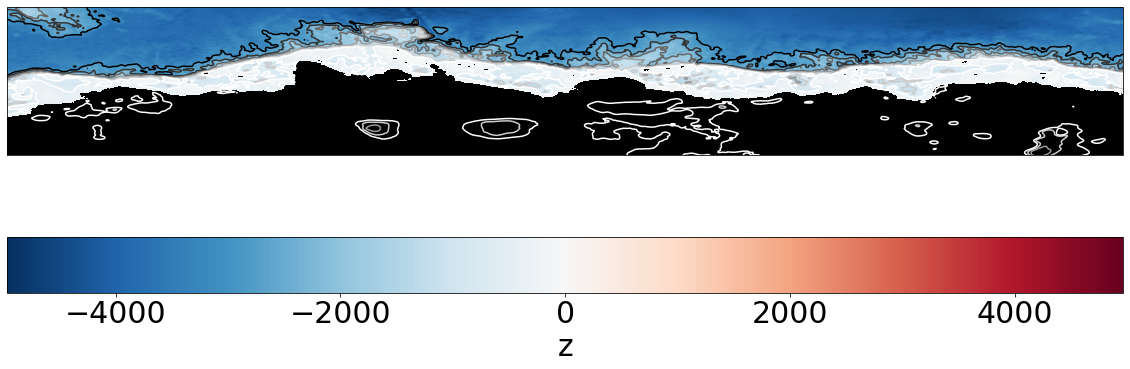

In [100]:
plt.figure(figsize = (20,10))
#ax = plt.axes(projection=ccrs.PlateCarree()); # ccrs.PlateCarree()
light_topo = cmap_map(lambda x: x/2 + 0.5, cmocean.cm.topo)
subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor='grey')

#ax = plt.axes(projection=ccrs.SouthPolarStereo())
p = ds.sel(y = slice(-70,-62)).sel(x = slice(80,140)).plot.pcolormesh( subplot_kws=subplot_kws,transform=ccrs.PlateCarree(),x='x', y='y', cbar_kwargs={'orientation': 'horizontal'})

ds.sel(y = slice(-70,-62)).sel(x = slice(80,140)).plot.contour(levels = range(-3000,0,500), cmap = 'gray', add_colorbar = False, subplot_kws=subplot_kws,transform=ccrs.PlateCarree(), x='x', y='y')#, transform = ccrs.PlateCarree())

#ds_ice.sel(y = slice(-70,-62)).sel(x = slice(80,140)).plot.contour(levels = [0], color = 'r', linewidth = 4, add_colorbar = False,subplot_kws=subplot_kws,transform=ccrs.PlateCarree(),x='x', y='y')
ds_ice.sel(y = slice(-70,-62)).sel(x = slice(80,140)).plot.contourf(levels = [0,6000], colors = ['None', 'k'], add_colorbar = False)#, transform = ccrs.PlateCarree())

#ax.gridlines(draw_labels=True)
'''
for i in range(len(cross_section_canyon)):
    plt.plot([cross_section_canyon[i][1][1],cross_section_canyon[i][2][1]],[cross_section_canyon[i][1][0], cross_section_canyon[i][2][0]],  color = cross_section_canyon[i][3], label = cross_section_canyon[i][0])
    
plt.legend()
'''
p.axes.set_extent([80, 140,-70, -62], ccrs.PlateCarree())

'''
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', draw_labels=True, alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([0,0,30,60,90, 120, 150, 180,180])
gl.ylocator = mticker.FixedLocator([-70,-70,-66,-62])
ax.set_aspect('equal', 'box')
'''

In [ ]:
plt.figure(figsize = (30,10))
ax = plt.axes(projection=ccrs.PlateCarree()); # ccrs.PlateCarree()
light_topo = cmap_map(lambda x: x/2 + 0.5, cmocean.cm.topo)
#subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor='grey')

#ax = plt.axes(projection=ccrs.SouthPolarStereo())
#ds.sel(y = slice(-72,-62)).sel(x = slice(0,180)).plot.contour(levels = range(-3000,0,500), cmap = 'Greys', add_colorbar = False, ax=ax, transform=ccrs.PlateCarree(), x='x', y='y')#, transform = ccrs.PlateCarree())
p = ds.sel(y = slice(-72,-62)).sel(x = slice(0,180)).plot.pcolormesh(ax = ax, transform=ccrs.PlateCarree(),x='x', y='y')

'''
#ds_ice.sel(y = slice(-72,-62)).sel(x = slice(0,180)).plot.contour(levels = [0], color = 'r', linewidth = 4, add_colorbar = False)
ds_ice.sel(y = slice(-72,-62)).sel(x = slice(0,180)).plot.contourf(levels = [0,6000], colors = ['None', 'k'], add_colorbar = False)#, transform = ccrs.PlateCarree())

#ax.gridlines(draw_labels=True)
for i in range(len(cross_section_canyon)):
    plt.plot([cross_section_canyon[i][1][1],cross_section_canyon[i][2][1]],[cross_section_canyon[i][1][0], cross_section_canyon[i][2][0]],  color = cross_section_canyon[i][3], label = cross_section_canyon[i][0])
    
plt.legend()
'''

ax.set_extent([0, 180,-72, -62])
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', draw_labels=True, alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([0,0,30,60,90, 120, 150, 180,180])
gl.ylocator = mticker.FixedLocator([-70,-70,-66,-62])
ax.set_aspect('equal', 'box')


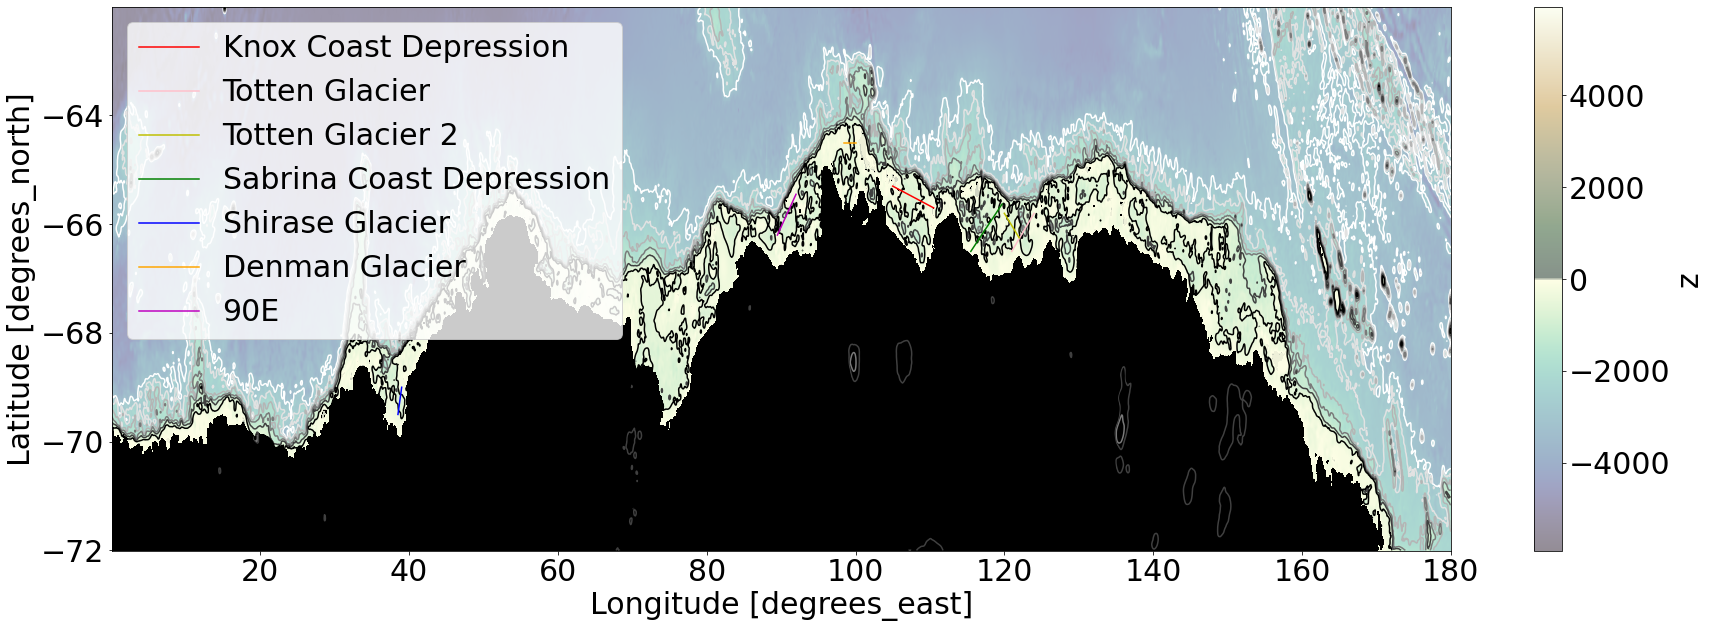

In [163]:
plt.figure(figsize = (30,10))
#ax = plt.axes()
light_topo = cmap_map(lambda x: x/2 + 0.5, cmocean.cm.topo)

#ax = plt.axes(projection=ccrs.SouthPolarStereo())
ds.sel(y = slice(-72,-62)).sel(x = slice(0,180)).plot.contour(levels = range(-3000,0,500), cmap = 'Greys', add_colorbar = False)#, transform = ccrs.PlateCarree())
ds.sel(y = slice(-72,-62)).sel(x = slice(0,180)).plot(cmap = light_topo)#, transform = ccrs.PlateCarree())
#ds_ice.sel(y = slice(-72,-62)).sel(x = slice(0,180)).plot.contour(levels = [0], color = 'r', linewidth = 4, add_colorbar = False)
ds_ice.sel(y = slice(-72,-62)).sel(x = slice(0,180)).plot.contourf(levels = [0,6000], colors = ['None', 'k'], add_colorbar = False)#, transform = ccrs.PlateCarree())

#ax.gridlines(draw_labels=True)
for i in range(len(cross_section_canyon)):
    plt.plot([cross_section_canyon[i][1][1],cross_section_canyon[i][2][1]],[cross_section_canyon[i][1][0], cross_section_canyon[i][2][0]],  color = cross_section_canyon[i][3], label = cross_section_canyon[i][0])
    
plt.legend()

In [258]:
 ['$\degree$S'] * len(range(68,62,-1))

['$\\degree$S',
 '$\\degree$S',
 '$\\degree$S',
 '$\\degree$S',
 '$\\degree$S',
 '$\\degree$S']

In [259]:
[*range(68,62,-1)] + ['$\degree$S']* len(range(68,62,-1))

[68,
 67,
 66,
 65,
 64,
 63,
 '$\\degree$S',
 '$\\degree$S',
 '$\\degree$S',
 '$\\degree$S',
 '$\\degree$S',
 '$\\degree$S']

In [264]:
for f, b in zip([*range(68,62,-1)], ['$\degree$S']* len(range(68,62,-1))):
    print(f,b)

68 $\degree$S
67 $\degree$S
66 $\degree$S
65 $\degree$S
64 $\degree$S
63 $\degree$S


In [263]:
list(zip([*range(68,62,-1)], ['$\degree$S']* len(range(68,62,-1))))

[(68, '$\\degree$S'),
 (67, '$\\degree$S'),
 (66, '$\\degree$S'),
 (65, '$\\degree$S'),
 (64, '$\\degree$S'),
 (63, '$\\degree$S')]

Text(0.5, 0, 'Latitude')

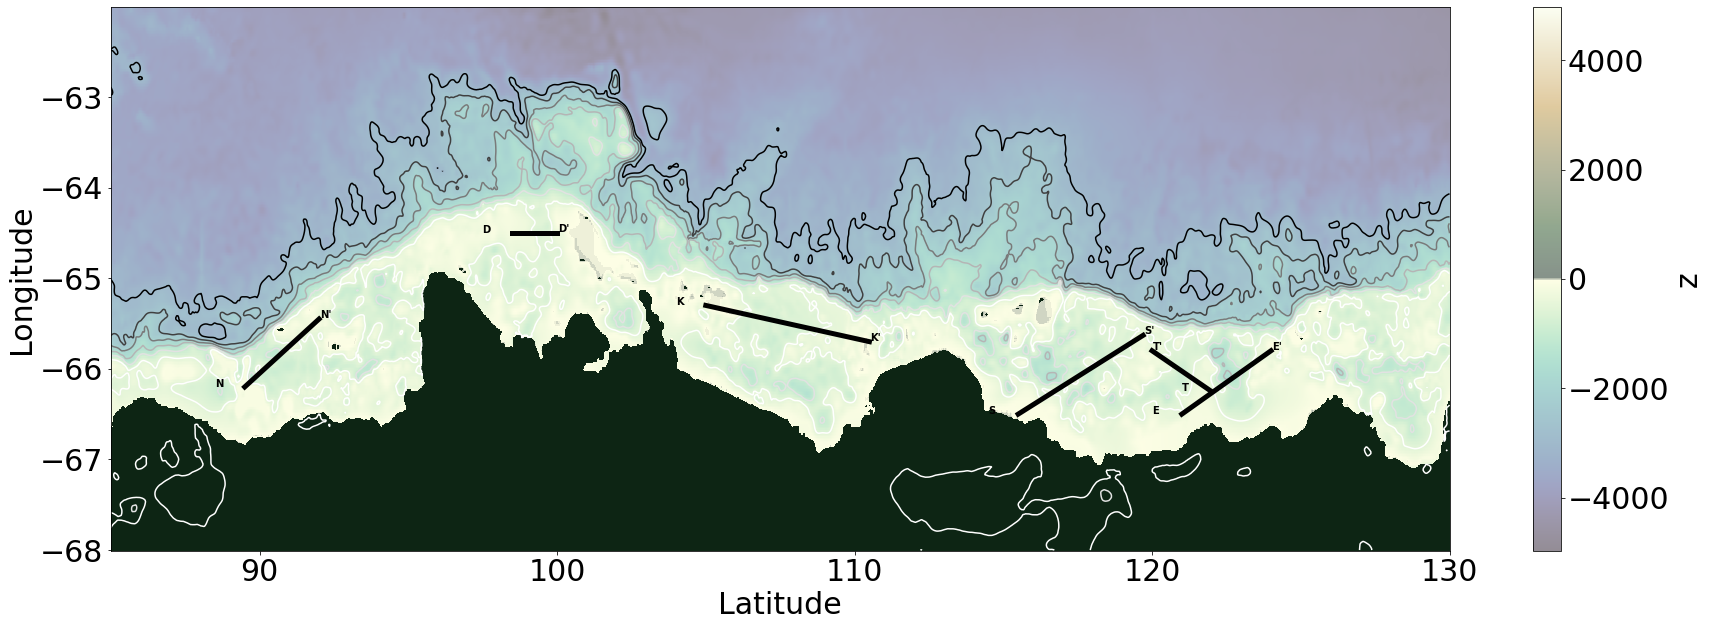

In [12]:
plt.figure(figsize = (30,10))
#ax = plt.axes()
light_topo = cmap_map(lambda x: x/2 + 0.5, cmocean.cm.topo)
cmap = matplotlib.cm.get_cmap(cmocean.cm.topo)
rgba = cmap(0.5)


#ax = plt.axes(projection=ccrs.SouthPolarStereo())
ds.sel(y = slice(-68,-62)).sel(x = slice(85,130)).plot.contour(levels = range(-3000,0,500), cmap = 'Greys_r', add_colorbar = False)#, transform = ccrs.PlateCarree())
ds.sel(y = slice(-68,-62)).sel(x = slice(85,130)).plot(cmap = light_topo)#, transform = ccrs.PlateCarree())
#ds_ice.sel(y = slice(-72,-62)).sel(x = slice(85,180)).plot.contour(levels = [0], color = 'r', linewidth = 4, add_colorbar = False)
ds_ice.sel(y = slice(-68,-62)).sel(x = slice(85,130)).plot.contourf(levels = [0,6000], colors = ['None', rgba], add_colorbar = False)#, transform = ccrs.PlateCarree())

#ax.gridlines(draw_labels=True)
for i in range(len(cross_section_canyon_wo_shirase)):
    plt.plot([cross_section_canyon_wo_shirase[i][1][1],cross_section_canyon_wo_shirase[i][2][1]],[cross_section_canyon_wo_shirase[i][1][0], cross_section_canyon_wo_shirase[i][2][0]],  color ='k', label = cross_section_canyon[i][0], lw = 5)
    plt.annotate(cross_section_label_wo_shirase[i][1], xy=(cross_section_canyon_wo_shirase[i][1][1], cross_section_canyon_wo_shirase[i][1][0]), xytext=(-30, 0),xycoords='data', textcoords='offset points', fontweight='bold')
    plt.annotate(cross_section_label_wo_shirase[i][1] + '\'', xy=(cross_section_canyon_wo_shirase[i][2][1], cross_section_canyon_wo_shirase[i][2][0]), xytext=(1, 1),xycoords='data', textcoords='offset points', fontweight='bold')
    
#plt.legend()
plt.ylabel('Longitude')
plt.xlabel('Latitude')
#latitude_ticks =[*range(68,62,-1)]
#degS_label =  ['$\degree$S']* len(latitude_ticks)
#plt.yticks(ticks = latitude_ticks, labels = list(zip(latitude_ticks,degS_label)))
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER

# Start running from here

East of prydz bay

In [12]:
shelf_coord = (-66.2,89.5)
deep_coord = (-65.45,92)
from metpy.interpolate import cross_section


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xarray/plot/dataarray_plot.py:2005: UserWarning: The following kwargs were not used by contour: 'color'
  primitive = ax.contour(x, y, z, **kwargs)


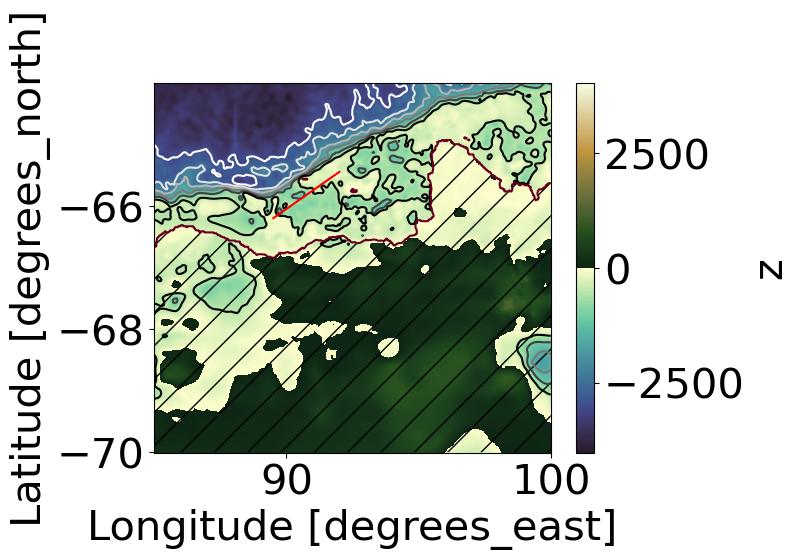

In [13]:
ds.sel(y = slice(-70,-64)).sel(x = slice(85,100)).plot.contour(levels = range(-3000,0,500), cmap = 'Greys')
ds.sel(y = slice(-70,-64)).sel(x = slice(85,100)).plot(cmap = cmocean.cm.topo)
ds_ice.sel(y = slice(-70,-64)).sel(x = slice(85,100)).plot.contourf(levels = [-3000,0,3000],colors='none', hatches = [None,None, '/'], add_colorbar = False)
ds_ice.sel(y = slice(-70,-64)).sel(x = slice(85,100)).plot.contour(levels = [0], color = 'r', add_colorbar = False)
# hatched regions are where there is surface ice
plt.plot([shelf_coord[1],deep_coord[1]],[shelf_coord[0], deep_coord[0]], 'r')

In [14]:
# Radius of the Earth in km
r = 6371
# Difference between points in lat/lon space
dlon = deep_coord[1]-shelf_coord[1]
dlat = deep_coord[0]-(shelf_coord[0])
# Calculate distance in km between the two end points
distance_endpoints = r * np.deg2rad(np.sqrt(dlat**2 + (dlon*np.cos(np.deg2rad(np.mean([deep_coord[0],shelf_coord[0]]))))**2))
# Create array with length of step_no
distance_in_km = np.linspace(0, distance_endpoints, 400)
# Repeat by the number of depth levels
#distance_in_km = np.tile(distance_in_km, 3000)

In [15]:
#temp_totten_interp = grid.interp(grid.interp(temp, axis = 'X'), axis = 'Y', boundary = "extend")

ds_bathymetry = xr.Dataset({"bathymetry": ds, "lat": ds.y, "lon": ds.x})
# Rename coordinate names
#ds_bathymetry = ds_bathymetry.rename({'xu_ocean': 'x', 'yu_ocean': 'y'})
# Convert latitude from ACCESS-OM2 default range of [-280, 80] to [-180, 180] which is what metpy expects.
#ds_bathymetry['x'] = ds_bathymetry['x']+100
ds_bathymetry['x'].attrs = ds['x'].attrs

ds_bathymetry_parsed = ds_bathymetry.metpy.parse_cf('bathymetry', coordinates={'y': 'y', 'x': 'x'})
batheymetry_slice = cross_section(ds_bathymetry_parsed, start=(deep_coord[0], deep_coord[1]), end=(shelf_coord[0], shelf_coord[1]), steps = 400, interp_type='linear')
#temp_totten_slice = cross_section(temp_totten_parsed, start=(-66.25, 118-360), end=(-65, 120-360), steps = 400, interp_type='linear')



Text(0, 0.5, 'Depth (m)')

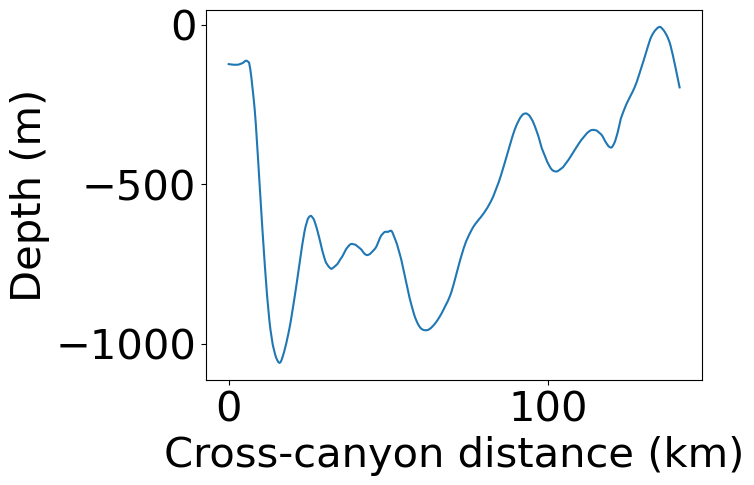

In [16]:
import matplotlib.pyplot as plt
plt.plot(distance_in_km,batheymetry_slice[::-1])
plt.xlabel('Cross-canyon distance (km)')
plt.ylabel('Depth (m)')

In [17]:
dist_90E = distance_in_km
bath_90E = batheymetry_slice

Knox Coast ( east of Totten)

In [18]:
shelf_coord = (-65.3,105)
deep_coord = (-65.7,110.5)
from metpy.interpolate import cross_section


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xarray/plot/dataarray_plot.py:2005: UserWarning: The following kwargs were not used by contour: 'color'
  primitive = ax.contour(x, y, z, **kwargs)


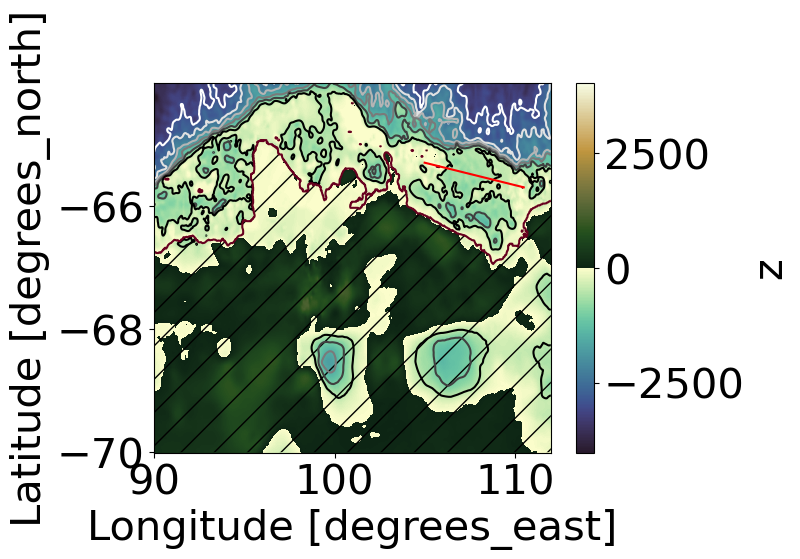

In [19]:
ds.sel(y = slice(-70,-64)).sel(x = slice(90,112)).plot.contour(levels = range(-3000,0,500), cmap = 'Greys')
ds.sel(y = slice(-70,-64)).sel(x = slice(90,112)).plot(cmap = cmocean.cm.topo)
ds_ice.sel(y = slice(-70,-64)).sel(x = slice(90,112)).plot.contourf(levels = [-3000,0,3000],colors='none', hatches = [None,None, '/'], add_colorbar = False)
ds_ice.sel(y = slice(-70,-64)).sel(x = slice(90,112)).plot.contour(levels = [0], color = 'r', add_colorbar = False)
# hatched regions are where there is surface ice
plt.plot([shelf_coord[1],deep_coord[1]],[shelf_coord[0], deep_coord[0]], 'r')

In [20]:
# Radius of the Earth in km
r = 6371
# Difference between points in lat/lon space
dlon = deep_coord[1]-shelf_coord[1]
dlat = deep_coord[0]-(shelf_coord[0])
# Calculate distance in km between the two end points
distance_endpoints = r * np.deg2rad(np.sqrt(dlat**2 + (dlon*np.cos(np.deg2rad(np.mean([deep_coord[0],shelf_coord[0]]))))**2))
# Create array with length of step_no
distance_in_km = np.linspace(0, distance_endpoints, 400)
# Repeat by the number of depth levels
#distance_in_km = np.tile(distance_in_km, 3000)

In [21]:
#temp_totten_interp = grid.interp(grid.interp(temp, axis = 'X'), axis = 'Y', boundary = "extend")

ds_bathymetry = xr.Dataset({"bathymetry": ds, "lat": ds.y, "lon": ds.x})
# Rename coordinate names
#ds_bathymetry = ds_bathymetry.rename({'xu_ocean': 'x', 'yu_ocean': 'y'})
# Convert latitude from ACCESS-OM2 default range of [-280, 80] to [-180, 180] which is what metpy expects.
#ds_bathymetry['x'] = ds_bathymetry['x']+100
ds_bathymetry['x'].attrs = ds['x'].attrs

ds_bathymetry_parsed = ds_bathymetry.metpy.parse_cf('bathymetry', coordinates={'y': 'y', 'x': 'x'})
batheymetry_slice = cross_section(ds_bathymetry_parsed, start=(deep_coord[0], deep_coord[1]), end=(shelf_coord[0], shelf_coord[1]), steps = 400, interp_type='linear')
#temp_totten_slice = cross_section(temp_totten_parsed, start=(-66.25, 118-360), end=(-65, 120-360), steps = 400, interp_type='linear')



Text(0, 0.5, 'Depth (m)')

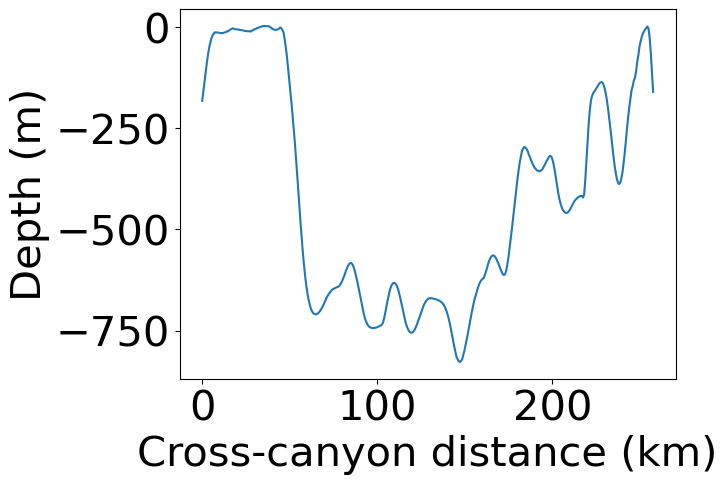

In [22]:
import matplotlib.pyplot as plt
plt.plot(distance_in_km,batheymetry_slice[::-1])
plt.xlabel('Cross-canyon distance (km)')
plt.ylabel('Depth (m)')

In [23]:
dist_knox = distance_in_km
bath_knox = batheymetry_slice

 Voyeykov Ice Shelf region, Arthur (2021)

In [24]:
shelf_coord = (-65.8,126)
deep_coord = (-65.5,129)
from metpy.interpolate import cross_section


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xarray/plot/dataarray_plot.py:2005: UserWarning: The following kwargs were not used by contour: 'color'
  primitive = ax.contour(x, y, z, **kwargs)


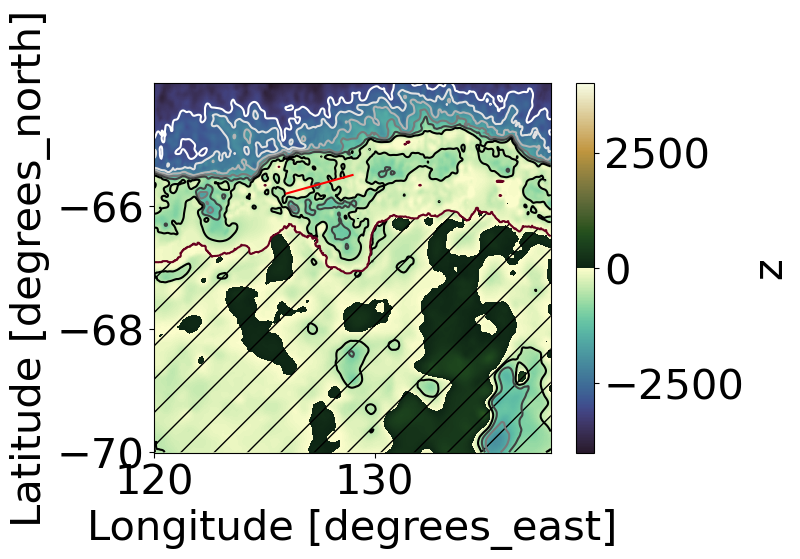

In [25]:
ds.sel(y = slice(-70,-64)).sel(x = slice(120,138)).plot.contour(levels = range(-3000,0,500), cmap = 'Greys')
ds.sel(y = slice(-70,-64)).sel(x = slice(120,138)).plot(cmap = cmocean.cm.topo)
ds_ice.sel(y = slice(-70,-64)).sel(x = slice(120,138)).plot.contourf(levels = [-3000,0,3000],colors='none', hatches = [None,None, '/'], add_colorbar = False)
ds_ice.sel(y = slice(-70,-64)).sel(x = slice(120,138)).plot.contour(levels = [0], color = 'r', add_colorbar = False)
# hatched regions are where there is surface ice
plt.plot([shelf_coord[1],deep_coord[1]],[shelf_coord[0], deep_coord[0]], 'r')

In [26]:
# Radius of the Earth in km
r = 6371
# Difference between points in lat/lon space
dlon = deep_coord[1]-shelf_coord[1]
dlat = deep_coord[0]-(shelf_coord[0])
# Calculate distance in km between the two end points
distance_endpoints = r * np.deg2rad(np.sqrt(dlat**2 + (dlon*np.cos(np.deg2rad(np.mean([deep_coord[0],shelf_coord[0]]))))**2))
# Create array with length of step_no
distance_in_km = np.linspace(0, distance_endpoints, 400)
# Repeat by the number of depth levels
#distance_in_km = np.tile(distance_in_km, 3000)

In [27]:
#temp_totten_interp = grid.interp(grid.interp(temp, axis = 'X'), axis = 'Y', boundary = "extend")

ds_bathymetry = xr.Dataset({"bathymetry": ds, "lat": ds.y, "lon": ds.x})
# Rename coordinate names
#ds_bathymetry = ds_bathymetry.rename({'xu_ocean': 'x', 'yu_ocean': 'y'})
# Convert latitude from ACCESS-OM2 default range of [-280, 80] to [-180, 180] which is what metpy expects.
#ds_bathymetry['x'] = ds_bathymetry['x']+100
ds_bathymetry['x'].attrs = ds['x'].attrs

ds_bathymetry_parsed = ds_bathymetry.metpy.parse_cf('bathymetry', coordinates={'y': 'y', 'x': 'x'})
batheymetry_slice = cross_section(ds_bathymetry_parsed, start=(deep_coord[0], deep_coord[1]), end=(shelf_coord[0], shelf_coord[1]), steps = 400, interp_type='linear')
#temp_totten_slice = cross_section(temp_totten_parsed, start=(-66.25, 118-360), end=(-65, 120-360), steps = 400, interp_type='linear')



Text(0, 0.5, 'Depth (m)')

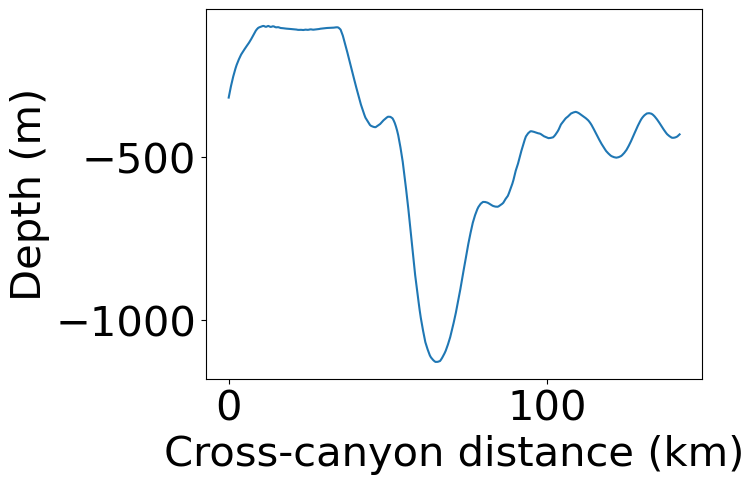

In [28]:
import matplotlib.pyplot as plt
plt.plot(distance_in_km,batheymetry_slice[::-1])
plt.xlabel('Cross-canyon distance (km)')
plt.ylabel('Depth (m)')

In [29]:
dist_voyeykov= distance_in_km
bath_voyeykov = batheymetry_slice

Totten Glacier example

In [30]:
shelf_coord = (-66.5,121)
deep_coord = (-65.8,124)
from metpy.interpolate import cross_section

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xarray/plot/dataarray_plot.py:2005: UserWarning: The following kwargs were not used by contour: 'color'
  primitive = ax.contour(x, y, z, **kwargs)


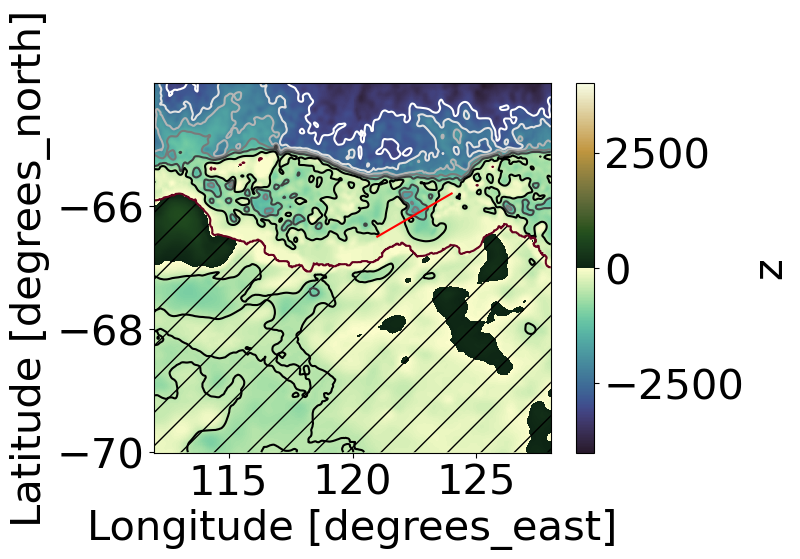

In [31]:
ds.sel(y = slice(-70,-64)).sel(x = slice(112,128)).plot.contour(levels = range(-3000,0,500), cmap = 'Greys')
ds.sel(y = slice(-70,-64)).sel(x = slice(112,128)).plot(cmap = cmocean.cm.topo)
ds_ice.sel(y = slice(-70,-64)).sel(x = slice(112,128)).plot.contourf(levels = [-3000,0,3000],colors='none', hatches = [None,None, '/'], add_colorbar = False)
ds_ice.sel(y = slice(-70,-64)).sel(x = slice(112,128)).plot.contour(levels = [0], color = 'r', add_colorbar = False)
# hatched regions are where there is surface ice
plt.plot([shelf_coord[1],deep_coord[1]],[shelf_coord[0], deep_coord[0]], 'r')

In [32]:
# Radius of the Earth in km
r = 6371
# Difference between points in lat/lon space
dlon = deep_coord[1]-shelf_coord[1]
dlat = deep_coord[0]-(shelf_coord[0])
# Calculate distance in km between the two end points
distance_endpoints = r * np.deg2rad(np.sqrt(dlat**2 + (dlon*np.cos(np.deg2rad(np.mean([deep_coord[0],shelf_coord[0]]))))**2))
# Create array with length of step_no
distance_in_km = np.linspace(0, distance_endpoints, 400)
# Repeat by the number of depth levels
#distance_in_km = np.tile(distance_in_km, 3000)

In [33]:
#temp_totten_interp = grid.interp(grid.interp(temp, axis = 'X'), axis = 'Y', boundary = "extend")

ds_bathymetry = xr.Dataset({"bathymetry": ds, "lat": ds.y, "lon": ds.x})
# Rename coordinate names
#ds_bathymetry = ds_bathymetry.rename({'xu_ocean': 'x', 'yu_ocean': 'y'})
# Convert latitude from ACCESS-OM2 default range of [-280, 80] to [-180, 180] which is what metpy expects.
#ds_bathymetry['x'] = ds_bathymetry['x']+100
ds_bathymetry['x'].attrs = ds['x'].attrs

ds_bathymetry_parsed = ds_bathymetry.metpy.parse_cf('bathymetry', coordinates={'y': 'y', 'x': 'x'})
batheymetry_slice = cross_section(ds_bathymetry_parsed, start=(deep_coord[0], deep_coord[1]), end=(shelf_coord[0], shelf_coord[1]), steps = 400, interp_type='linear')
#temp_totten_slice = cross_section(temp_totten_parsed, start=(-66.25, 118-360), end=(-65, 120-360), steps = 400, interp_type='linear')



Text(0, 0.5, 'Depth (m)')

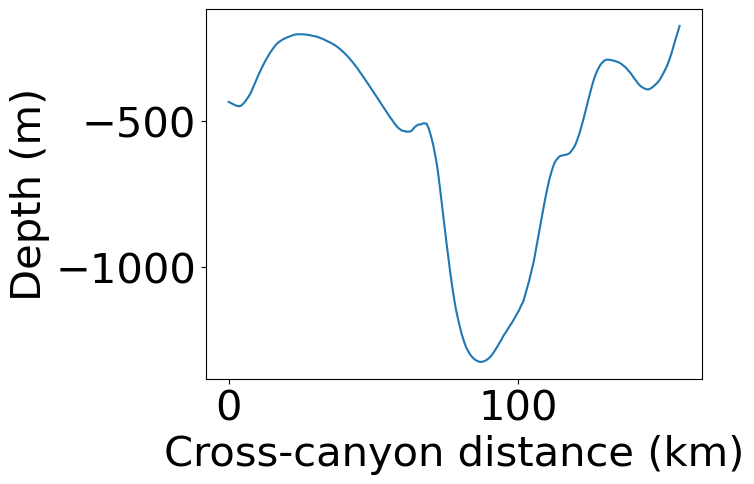

In [34]:
import matplotlib.pyplot as plt
plt.plot(distance_in_km,batheymetry_slice[::-1])
plt.xlabel('Cross-canyon distance (km)')
plt.ylabel('Depth (m)')

In [35]:
dist_totten = distance_in_km
bath_totten = batheymetry_slice

Totten 2

In [36]:
shelf_coord = (-66.25,122)
deep_coord = (-65.9,120.2)
from metpy.interpolate import cross_section


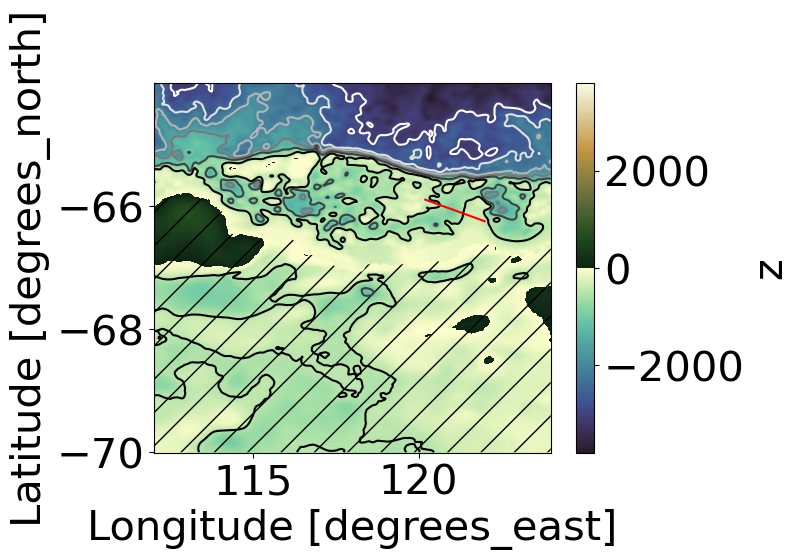

In [37]:
ds.sel(y = slice(-70,-64)).sel(x = slice(112,124)).plot.contour(levels = range(-3000,0,500), cmap = 'Greys')
ds.sel(y = slice(-70,-64)).sel(x = slice(112,124)).plot(cmap = cmocean.cm.topo)
ds_ice.sel(y = slice(-70,-64)).sel(x = slice(112,124)).plot.contourf(levels = [-3000,0,3000],colors='none', hatches = [None,None, '/'], add_colorbar = False)

# hatched regions are where there is surface ice
plt.plot([shelf_coord[1],deep_coord[1]],[shelf_coord[0], deep_coord[0]], 'r')

In [38]:
# Radius of the Earth in km
r = 6371
# Difference between points in lat/lon space
dlon = deep_coord[1]-shelf_coord[1]
dlat = deep_coord[0]-(shelf_coord[0])
# Calculate distance in km between the two end points
distance_endpoints = r * np.deg2rad(np.sqrt(dlat**2 + (dlon*np.cos(np.deg2rad(np.mean([deep_coord[0],shelf_coord[0]]))))**2))
# Create array with length of step_no
distance_in_km = np.linspace(0, distance_endpoints, 400)
# Repeat by the number of depth levels
#distance_in_km = np.tile(distance_in_km, 3000)

In [39]:
#temp_totten_interp = grid.interp(grid.interp(temp, axis = 'X'), axis = 'Y', boundary = "extend")

ds_bathymetry = xr.Dataset({"bathymetry": ds, "lat": ds.y, "lon": ds.x})
# Rename coordinate names
#ds_bathymetry = ds_bathymetry.rename({'xu_ocean': 'x', 'yu_ocean': 'y'})
# Convert latitude from ACCESS-OM2 default range of [-280, 80] to [-180, 180] which is what metpy expects.
#ds_bathymetry['x'] = ds_bathymetry['x']+100
ds_bathymetry['x'].attrs = ds['x'].attrs

ds_bathymetry_parsed = ds_bathymetry.metpy.parse_cf('bathymetry', coordinates={'y': 'y', 'x': 'x'})
batheymetry_slice = cross_section(ds_bathymetry_parsed, start=(deep_coord[0], deep_coord[1]), end=(shelf_coord[0], shelf_coord[1]), steps = 400, interp_type='linear')
#temp_totten_slice = cross_section(temp_totten_parsed, start=(-66.25, 118-360), end=(-65, 120-360), steps = 400, interp_type='linear')



Text(0, 0.5, 'Depth (m)')

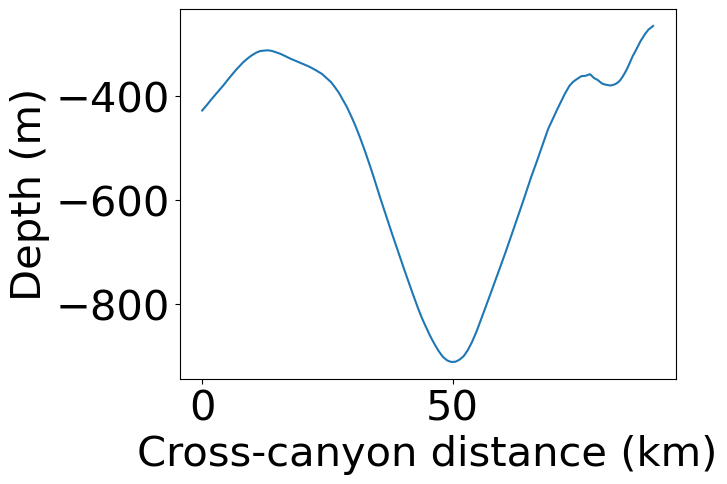

In [40]:
import matplotlib.pyplot as plt
plt.plot(distance_in_km,batheymetry_slice[::-1])
plt.xlabel('Cross-canyon distance (km)')
plt.ylabel('Depth (m)')

In [41]:
dist_totten2 = distance_in_km
bath_totten2 = batheymetry_slice

Shirase Glacier

In [42]:
shelf_coord = (-69.5,38.5)
deep_coord = (-69,39)
from metpy.interpolate import cross_section


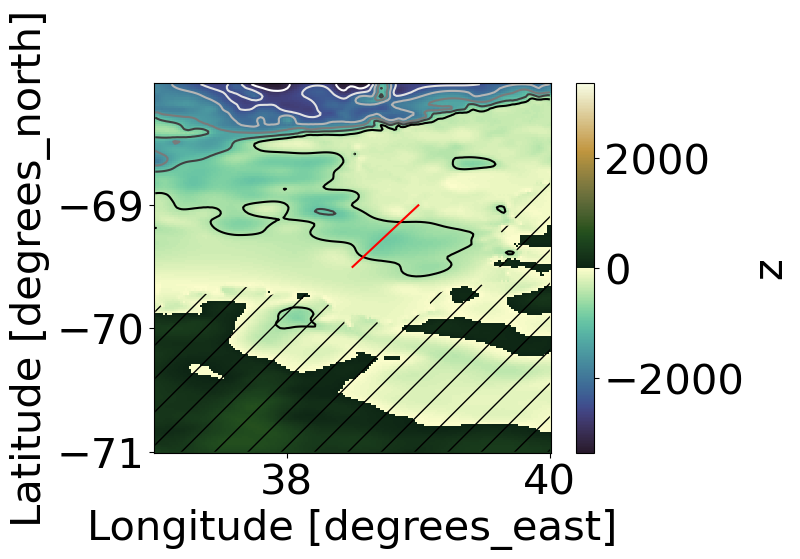

In [43]:
ds.sel(y = slice(-71,-68)).sel(x = slice(37,40)).plot.contour(levels = range(-3000,0,500), cmap = 'Greys')
ds.sel(y = slice(-71,-68)).sel(x = slice(37,40)).plot(cmap = cmocean.cm.topo)
ds_ice.sel(y = slice(-71,-68)).sel(x = slice(37,40)).plot.contourf(levels = [-3000,0,3000],colors='none', hatches = [None,None, '/'], add_colorbar = False)

# hatched regions are where there is surface ice
plt.plot([shelf_coord[1],deep_coord[1]],[shelf_coord[0], deep_coord[0]], 'r')

In [44]:
# Radius of the Earth in km
r = 6371
# Difference between points in lat/lon space
dlon = deep_coord[1]-shelf_coord[1]
dlat = deep_coord[0]-(shelf_coord[0])
# Calculate distance in km between the two end points
distance_endpoints = r * np.deg2rad(np.sqrt(dlat**2 + (dlon*np.cos(np.deg2rad(np.mean([deep_coord[0],shelf_coord[0]]))))**2))
# Create array with length of step_no
distance_in_km = np.linspace(0, distance_endpoints, 400)
# Repeat by the number of depth levels
#distance_in_km = np.tile(distance_in_km, 3000)

In [45]:
#temp_totten_interp = grid.interp(grid.interp(temp, axis = 'X'), axis = 'Y', boundary = "extend")

ds_bathymetry = xr.Dataset({"bathymetry": ds, "lat": ds.y, "lon": ds.x})
# Rename coordinate names
#ds_bathymetry = ds_bathymetry.rename({'xu_ocean': 'x', 'yu_ocean': 'y'})
# Convert latitude from ACCESS-OM2 default range of [-280, 80] to [-180, 180] which is what metpy expects.
#ds_bathymetry['x'] = ds_bathymetry['x']+100
ds_bathymetry['x'].attrs = ds['x'].attrs

ds_bathymetry_parsed = ds_bathymetry.metpy.parse_cf('bathymetry', coordinates={'y': 'y', 'x': 'x'})
batheymetry_slice = cross_section(ds_bathymetry_parsed, start=(deep_coord[0], deep_coord[1]), end=(shelf_coord[0], shelf_coord[1]), steps = 400, interp_type='linear')
#temp_totten_slice = cross_section(temp_totten_parsed, start=(-66.25, 118-360), end=(-65, 120-360), steps = 400, interp_type='linear')



Text(0, 0.5, 'Depth (m)')

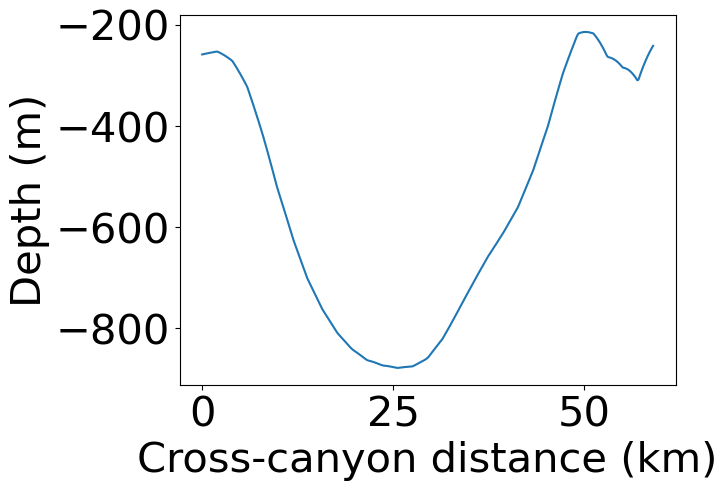

In [46]:
import matplotlib.pyplot as plt
plt.plot(distance_in_km,batheymetry_slice[::-1])
plt.xlabel('Cross-canyon distance (km)')
plt.ylabel('Depth (m)')

In [47]:
dist_shirase= distance_in_km
bath_shirase = batheymetry_slice

30E entering Weddell Sea (no canyon, Dong et al. 2015)

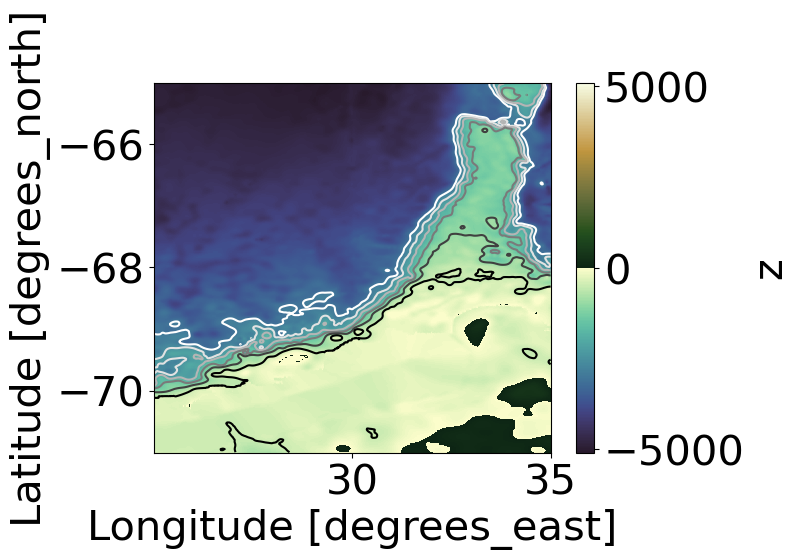

In [49]:
ds.sel(y = slice(-71,-65)).sel(x = slice(25,35)).plot.contour(levels = range(-3000,0,500), cmap = 'Greys')
ds.sel(y = slice(-71,-65)).sel(x = slice(25,35)).plot(cmap = cmocean.cm.topo)
ds_ice.sel(y = slice(-71,-68)).sel(x = slice(37,40)).plot.contourf(levels = [-3000,0,3000],colors='none', hatches = [None,None, '/'], add_colorbar = False)

# hatched regions are where there is surface ice
plt.plot([shelf_coord[1],deep_coord[1]],[shelf_coord[0], deep_coord[0]], 'r')

Denman Glacier 

In [49]:
shelf_coord = (-64.5,98.5)
deep_coord = (-64.5,100)
from metpy.interpolate import cross_section


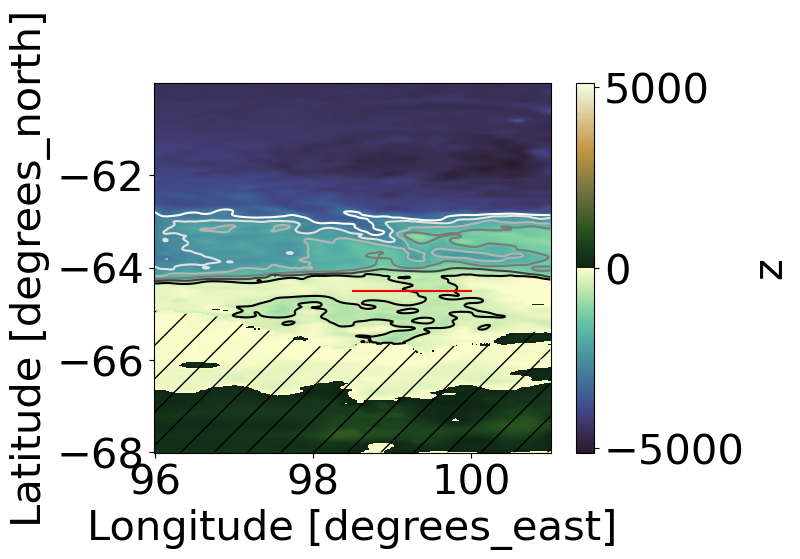

In [50]:
ds.sel(y = slice(-68,-60)).sel(x = slice(96,101)).plot.contour(levels = range(-3000,0,500), cmap = 'Greys')
ds.sel(y = slice(-68,-60)).sel(x = slice(96,101)).plot(cmap = cmocean.cm.topo)
ds_ice.sel(y =slice(-68,-60)).sel(x = slice(96,101)).plot.contourf(levels = [-3000,0,3000],colors='none', hatches = [None,None, '/'], add_colorbar = False)

# hatched regions are where there is surface ice
plt.plot([shelf_coord[1],deep_coord[1]],[shelf_coord[0], deep_coord[0]], 'r')

In [51]:
# Radius of the Earth in km
r = 6371
# Difference between points in lat/lon space
dlon = deep_coord[1]-shelf_coord[1]
dlat = deep_coord[0]-(shelf_coord[0])
# Calculate distance in km between the two end points
distance_endpoints = r * np.deg2rad(np.sqrt(dlat**2 + (dlon*np.cos(np.deg2rad(np.mean([deep_coord[0],shelf_coord[0]]))))**2))
# Create array with length of step_no
distance_in_km = np.linspace(0, distance_endpoints, 400)
# Repeat by the number of depth levels
#distance_in_km = np.tile(distance_in_km, 3000)

In [52]:
#temp_totten_interp = grid.interp(grid.interp(temp, axis = 'X'), axis = 'Y', boundary = "extend")

ds_bathymetry = xr.Dataset({"bathymetry": ds, "lat": ds.y, "lon": ds.x})
# Rename coordinate names
#ds_bathymetry = ds_bathymetry.rename({'xu_ocean': 'x', 'yu_ocean': 'y'})
# Convert latitude from ACCESS-OM2 default range of [-280, 80] to [-180, 180] which is what metpy expects.
#ds_bathymetry['x'] = ds_bathymetry['x']+100
ds_bathymetry['x'].attrs = ds['x'].attrs

ds_bathymetry_parsed = ds_bathymetry.metpy.parse_cf('bathymetry', coordinates={'y': 'y', 'x': 'x'})
batheymetry_slice = cross_section(ds_bathymetry_parsed, start=(deep_coord[0], deep_coord[1]), end=(shelf_coord[0], shelf_coord[1]), steps = 400, interp_type='linear')
#temp_totten_slice = cross_section(temp_totten_parsed, start=(-66.25, 118-360), end=(-65, 120-360), steps = 400, interp_type='linear')



Text(0, 0.5, 'Depth (m)')

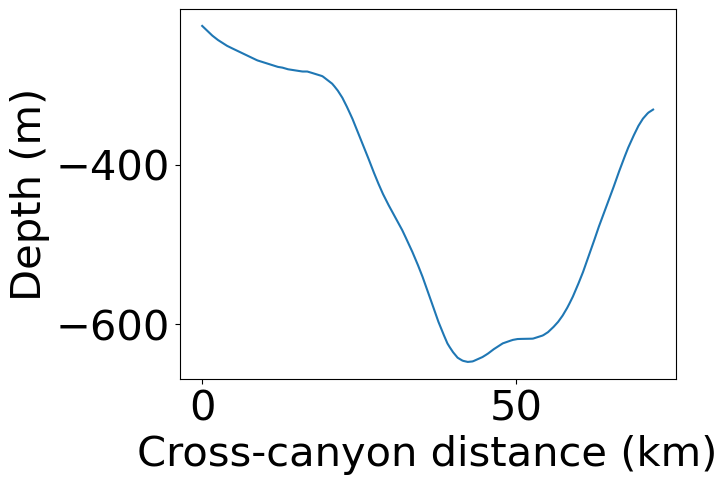

In [53]:
import matplotlib.pyplot as plt
plt.plot(distance_in_km,batheymetry_slice[::-1])
plt.xlabel('Cross-canyon distance (km)')
plt.ylabel('Depth (m)')

In [54]:
dist_denman= distance_in_km
bath_denman = batheymetry_slice

Sabrina Coast Depression (Hirano 2021)

In [55]:
shelf_coord = (-65.3,116.5)#(-66.5,115.5)
deep_coord = (-65.7,121.8)#(-65.63,119.7)
from metpy.interpolate import cross_section


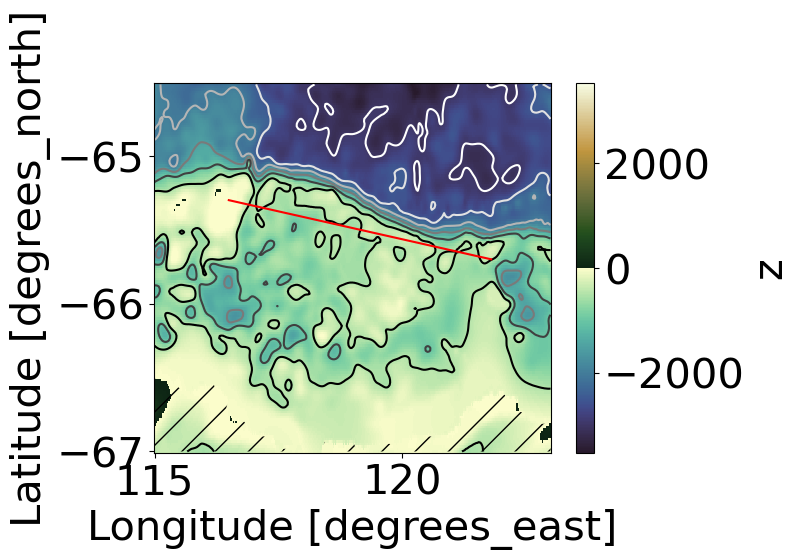

In [56]:
ds.sel(y = slice(-67,-64.5)).sel(x = slice(115,123)).plot.contour(levels = range(-3000,0,500), cmap = 'Greys')
ds.sel(y = slice(-67,-64.5)).sel(x = slice(115,123)).plot(cmap = cmocean.cm.topo)
ds_ice.sel(y =slice(-67,-64.5)).sel(x = slice(115,123)).plot.contourf(levels = [-3000,0,3000],colors='none', hatches = [None,None, '/'], add_colorbar = False)

# hatched regions are where there is surface ice
plt.plot([shelf_coord[1],deep_coord[1]],[shelf_coord[0], deep_coord[0]], 'r')

In [57]:
# Radius of the Earth in km
r = 6371
# Difference between points in lat/lon space
dlon = deep_coord[1]-shelf_coord[1]
dlat = deep_coord[0]-(shelf_coord[0])
# Calculate distance in km between the two end points
distance_endpoints = r * np.deg2rad(np.sqrt(dlat**2 + (dlon*np.cos(np.deg2rad(np.mean([deep_coord[0],shelf_coord[0]]))))**2))
# Create array with length of step_no
distance_in_km = np.linspace(0, distance_endpoints, 400)
# Repeat by the number of depth levels
#distance_in_km = np.tile(distance_in_km, 3000)

In [58]:
#temp_totten_interp = grid.interp(grid.interp(temp, axis = 'X'), axis = 'Y', boundary = "extend")

ds_bathymetry = xr.Dataset({"bathymetry": ds, "lat": ds.y, "lon": ds.x})
# Rename coordinate names
#ds_bathymetry = ds_bathymetry.rename({'xu_ocean': 'x', 'yu_ocean': 'y'})
# Convert latitude from ACCESS-OM2 default range of [-280, 80] to [-180, 180] which is what metpy expects.
#ds_bathymetry['x'] = ds_bathymetry['x']+100
ds_bathymetry['x'].attrs = ds['x'].attrs

ds_bathymetry_parsed = ds_bathymetry.metpy.parse_cf('bathymetry', coordinates={'y': 'y', 'x': 'x'})
batheymetry_slice = cross_section(ds_bathymetry_parsed, start=(deep_coord[0], deep_coord[1]), end=(shelf_coord[0], shelf_coord[1]), steps = 400, interp_type='linear')
#temp_totten_slice = cross_section(temp_totten_parsed, start=(-66.25, 118-360), end=(-65, 120-360), steps = 400, interp_type='linear')



Text(0, 0.5, 'Depth (m)')

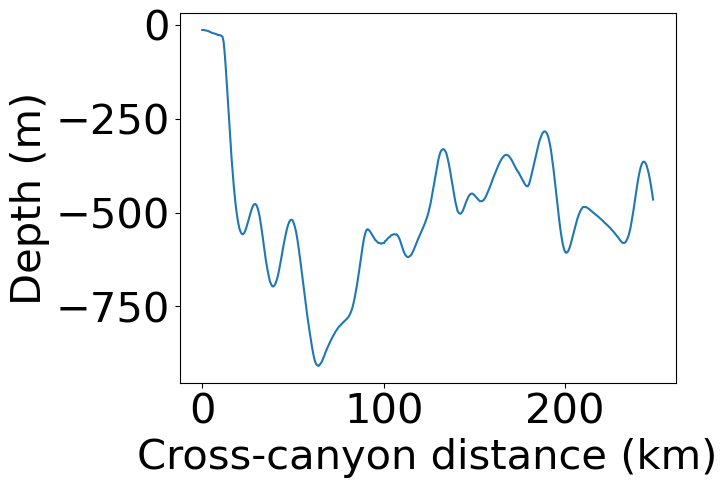

In [59]:
import matplotlib.pyplot as plt
plt.plot(distance_in_km,batheymetry_slice[::-1])
plt.xlabel('Cross-canyon distance (km)')
plt.ylabel('Depth (m)')

In [60]:
dist_sabrina= distance_in_km
bath_sabrina = batheymetry_slice

In [61]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [62]:
from matplotlib import rc
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size':30})
rc('xtick', labelsize=30) 
rc('ytick', labelsize=30) 
rc('axes', titlesize=30)    # fontsize of the axes title
rc('axes', labelsize=30)    # fontsize of the x and y labels

import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os

Define basic model configuration parameters.

In [63]:
# Configuration parameters
# (prescribed by user)
#EO: 2021-05-03 uses dimensions mimicking those of Stewart and Thompson (2015)

nlayers = 4    #number of layers

# domain size
Lx = 1000      # domain zonal extent [km]
Ly = 500      # domain meridional extent [km]
H  = 3000  # total fluid's depth in [m]


# bathymetric details
h0 = 2500   # topographic slope height in [m]
#sigh = 50#200  # slope width [km]

#isopycnal layer thickness diff
sigh_rho = 90#140 #40 #80 # isopycnal slope width [km] #140 dense. 40 warm

gridspacing = 1  # in [km]

# wind stress forcing
tau0 = 0.1#0.018 # peak wind stress value [N/m^2] --> 0.025,0.05,0.075,0.1
sigh_tau = 500 #500 # width of wind stress forcing [km]
tau_offset = 0#100#-50#-30 #-100#0 #12.5 # wind offset from the centre of the domain [km]

In [64]:
ninterf = nlayers + 1    #number of interfaces
interfaces = np.arange(0,  ninterf)


nx = round(Lx/gridspacing)
ny = round(Ly/gridspacing)

layerdensities = [1027.18, 1027.65, 1028.00 ]  # [kg/m^3]
layerdensities = [1027.18, 1027.32, 1027.45]  # [kg/m^3]
layerdensities = [1028.0, 1028.1, 1028.3]  
#layerdensities = [1028.0, 1028.1, 1028.2]  
#restintefaceheights = [0.0, -544.73, -1432.95] # [m]
restintefaceheights = [0.0, -300, -900]
#restintefaceheights = [0.0, -300, -600]

layerdensities =  [1027.8, 1028.0, 1028.1, 1028.3]  
restintefaceheights = [0.0,-50 , -300, -900]

# Building steep-sided function
\begin{equation}
    F = 0.5 \frac{sin(2\pi \frac{x + \sigma_h}{w}) }{ \sqrt( (sin(2\pi \frac{x + \sigma_h}{w}))^{2} + a^{2})} + 0.5
\end{equation}

In [65]:
def funcsteep(xxx,a,sigma_h):
    '''
    sigma_h = half of canyon width
    xx: x coordinate
    a: extra smoothing amplitude?
    '''
    w = sigma_h*4
    func = [0.5*np.sin(((xxx[i]+sigma_h)/w )*2*np.pi)/np.sqrt(np.sin(((xxx[i]+sigma_h)/w) *2*np.pi)**2 + a**2) +0.5 for i in range(1000)]
    for i in range(490 - round(1.75 *sigma_h)):
        func[i] = 0
    for i in range(510 + round(1.75 * sigma_h),1000):
        func[i] = 0
        
    return func

In [83]:
#CONTINOUS CANYON
width_sill = 70#200 sill shave##70 

x = np.arange(-Lx/2, Lx/2, gridspacing)
y = np.arange(-Ly/2, Ly/2, gridspacing)

H = 3000#1600
h0 = 2500#1000
sigma_h = 100  #125#75#37.5#62.5#75#100 #200 #50
h0canyon = 400
sigma_bottom = 100 #30#100 ### 100 width for dense

hbottom = np.zeros((ny))
bottom = np.zeros((ny, nx))
bottomgaussian = np.zeros((ny, nx))


def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)


for leny in np.arange(0,len(y)):
    #hbottom[leny] = - (h0/2)*np.tanh(y[leny]/(sigma_h/2))
    hbottom[leny] = - (h0/2)*np.tanh(y[leny]/(sigma_bottom/2))
    ## SILL
    hbottom[leny] = - (h0/2)*np.tanh(y[leny]/(sigma_bottom/2)) *(1-gaussian(leny/width_sill, 0, 1))

steep_x = funcsteep(x,a, sigma_h)

for leny in np.arange(0,len(y)):
    for lenx in np.arange(0,len(x)):
        #bottom[leny,lenx] = -H + h0/2 + hbottom[leny] - h0canyon * (1 - np.tanh((y[leny])/(sigma_bottom/2)))/2 * np.exp(-x[lenx]**2/sigma_h**2)
            # copies from build input gaussian::: bottom[leny,lenx] = -H + h0/2 + hbottom[leny] - h0canyon * (1 - np.tanh((y[leny])/(sigma_bottom/2)))/2 * np.exp(-x[lenx]**2/sigma_h**2)

        bottom[leny,lenx] = -H + h0/2 + hbottom[leny] - h0canyon * (1 - np.tanh((y[leny])/(sigma_bottom/2)))/2 * steep_x[lenx]
        bottomgaussian[leny,lenx] = -H + h0/2 + hbottom[leny] - h0canyon * (1 - np.tanh((y[leny])/(sigma_bottom/2)))/2 * np.exp(-x[lenx]**2/sigma_h**2)

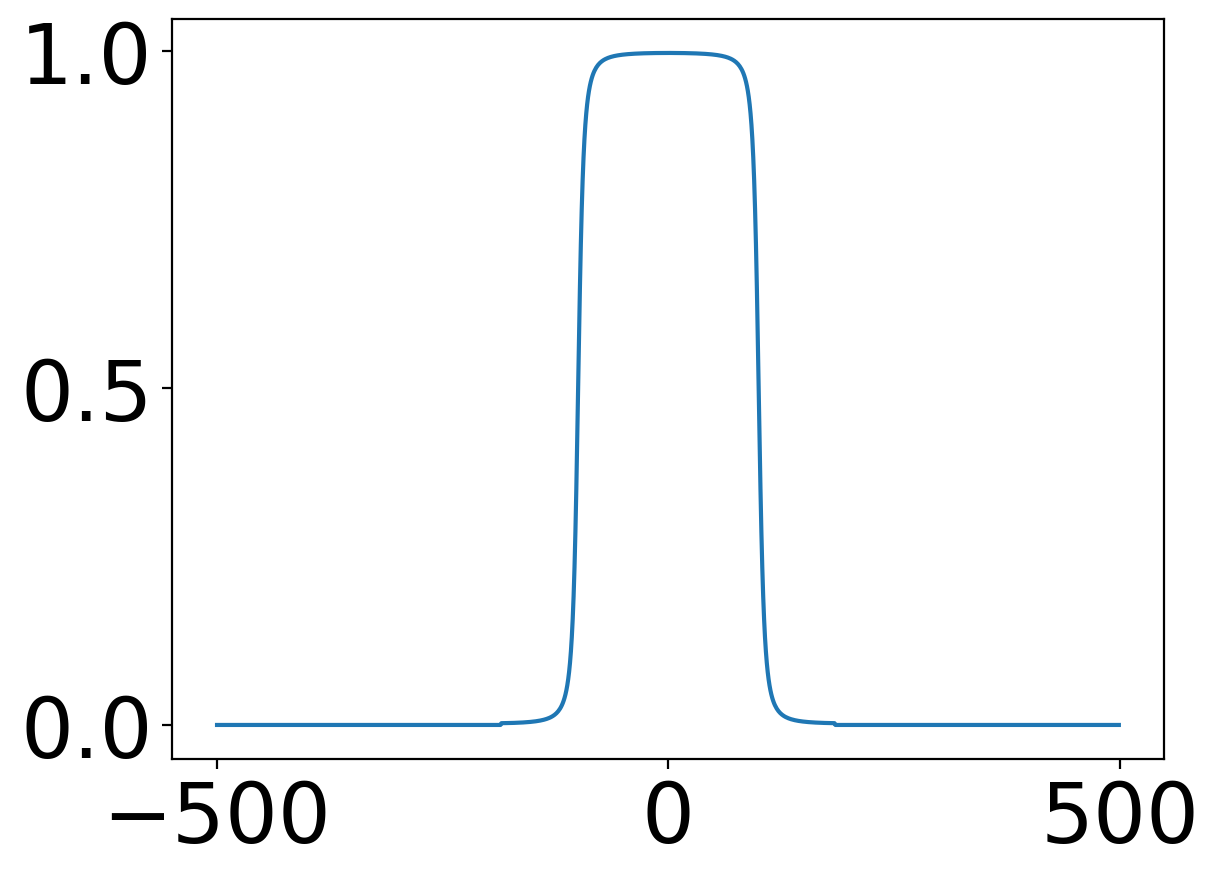

In [73]:
sigma_h = 100
xxx = range(-500,500)
a = 0.1#0.002
w = sigma_h *4
plt.plot(x,funcsteep(x,a, sigma_h))
#plt.plot(x,funcsteep(x,0.01, sigma_h))

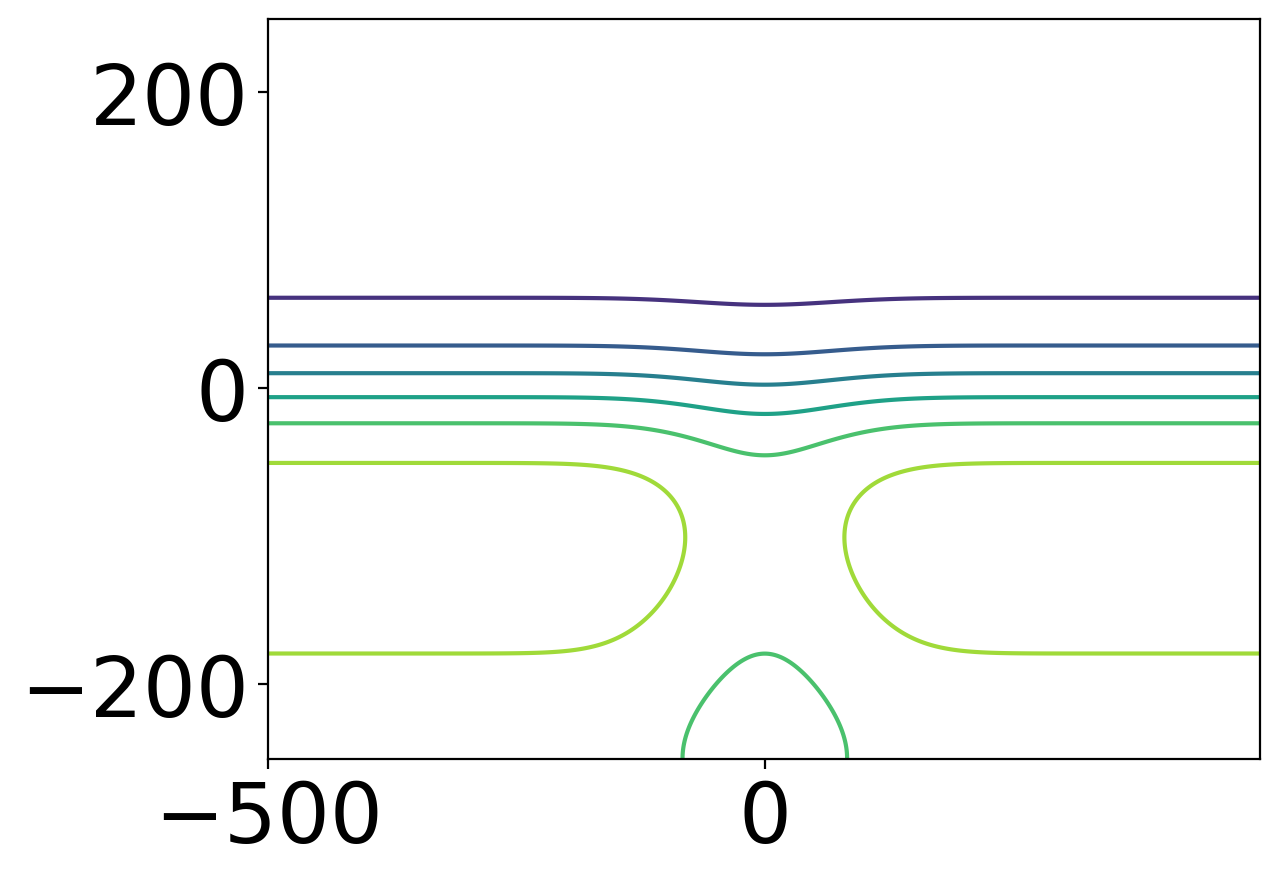

In [76]:
plt.contour(x,y,bottomgaussian)

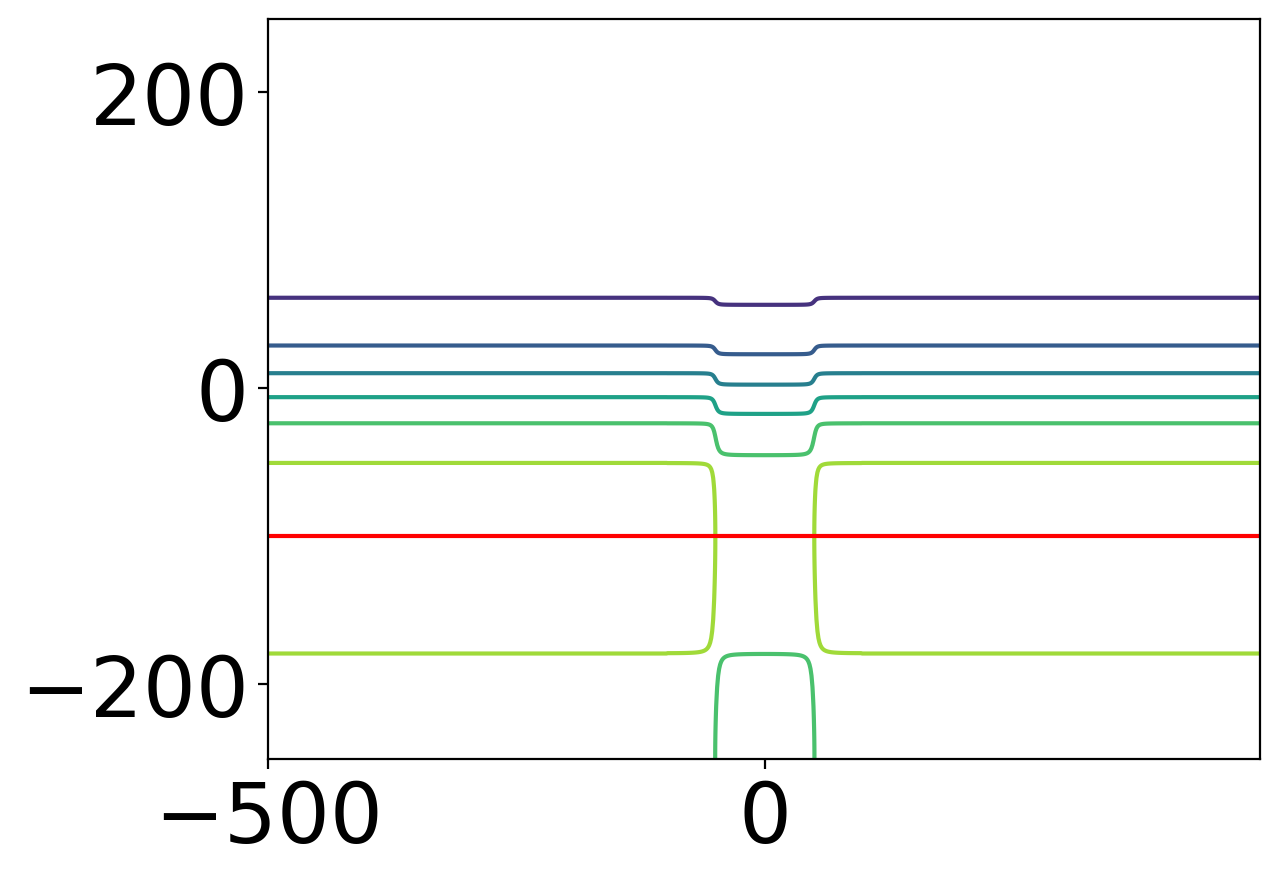

In [80]:
plt.contour(x,y,bottom)
plt.plot(x, np.ones(len(x))*-100, 'r')
#plt.contour(x,y,bottom, levels = [-1000])


In [82]:
# save for canyons to plot - narrow: 20km width, wide: 200km
bottom_narrow = bottom
bottom_narrow_gaussian = bottomgaussian

In [84]:
bottom_wide = bottom
bottom_wide_gaussian = bottomgaussian

In [109]:
# save each canyon width to compare - optional with cells below
bottom_50 = bottom
bottom_50_gaussian = bottomgaussian

In [ ]:
fig, (ax1,ax2)= plt.subplots(2, 1, figsize = (35,18))
ax1.plot(x[450:550]-10,bottom_narrow[150,450:550], label = '20km canyon',  lw =linewidth, color = 'C0')
ax1.plot(x[350:650]-25,bottom_50[150,350:650], label = '50km canyon',  lw =linewidth, color = 'C1')
ax1.plot(x[350:650]-50,bottom_100[150,350:650], label = '100km canyon',  lw =linewidth, color = 'C2')
ax1.plot(x[350:650]-75,bottom_150[150,350:650], label = '150km canyon',  lw =linewidth, color = 'C3')
ax1.plot(x[350:650]-100,bottom_wide[150,350:650],  label = '200km canyon', lw =linewidth, color = 'C4')
ax1.legend(loc = 'lower right')
ax1.set_ylim([-1200,-200])

ax2.plot(x[450:550]-10,bottom_narrow_gaussian[150,450:550], label = '20km gaussian canyon',  lw =linewidth*0.5, color = 'C0', linestyle = 'dashed')
ax2.plot(x[350:650]-25,bottom_50_gaussian[150,350:650], label = '50km gaussian canyon',  lw =linewidth*0.5, color = 'C1', linestyle = 'dashed')
ax2.plot(x[350:650]-50,bottom_100_gaussian[150,350:650], label = '100km gaussian canyon',  lw =linewidth*0.5, color = 'C2', linestyle = 'dashed')
ax2.plot(x[350:650]-75,bottom_150_gaussian[150,350:650], label = '150km gaussian canyon',  lw =linewidth*0.5, color = 'C3', linestyle = 'dashed')
ax2.plot(x[350:650]-100,bottom_wide_gaussian[150,350:650],  label = '200km gaussian canyon', lw =linewidth*0.5, color = 'C4', linestyle = 'dashed')
ax2.legend(loc = 'lower right')
ax2.set_ylim([-1200,-200])

plt.xlabel('Cross-canyon Distance (km)')
plt.ylabel('Depth (m)')

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(dist_denman+25, bath_denman, label = 'Denman' , color = cross_section_canyon[5][3])
plt.plot(dist_shirase+15, bath_shirase, label = 'Shirase', color = cross_section_canyon[4][3])
plt.plot(dist_totten-15,bath_totten, label = 'Totten', color = cross_section_canyon[1][3])
plt.plot(dist_totten2-5,bath_totten2, label = 'Totten2', color = cross_section_canyon[2][3])

plt.plot(x[450:550]+50,bottom[148,450:550], label = 'Narrow canyon')
plt.legend()
plt.xlabel('Cross-canyon Distance (km)')

(-1400.0, 0.0)

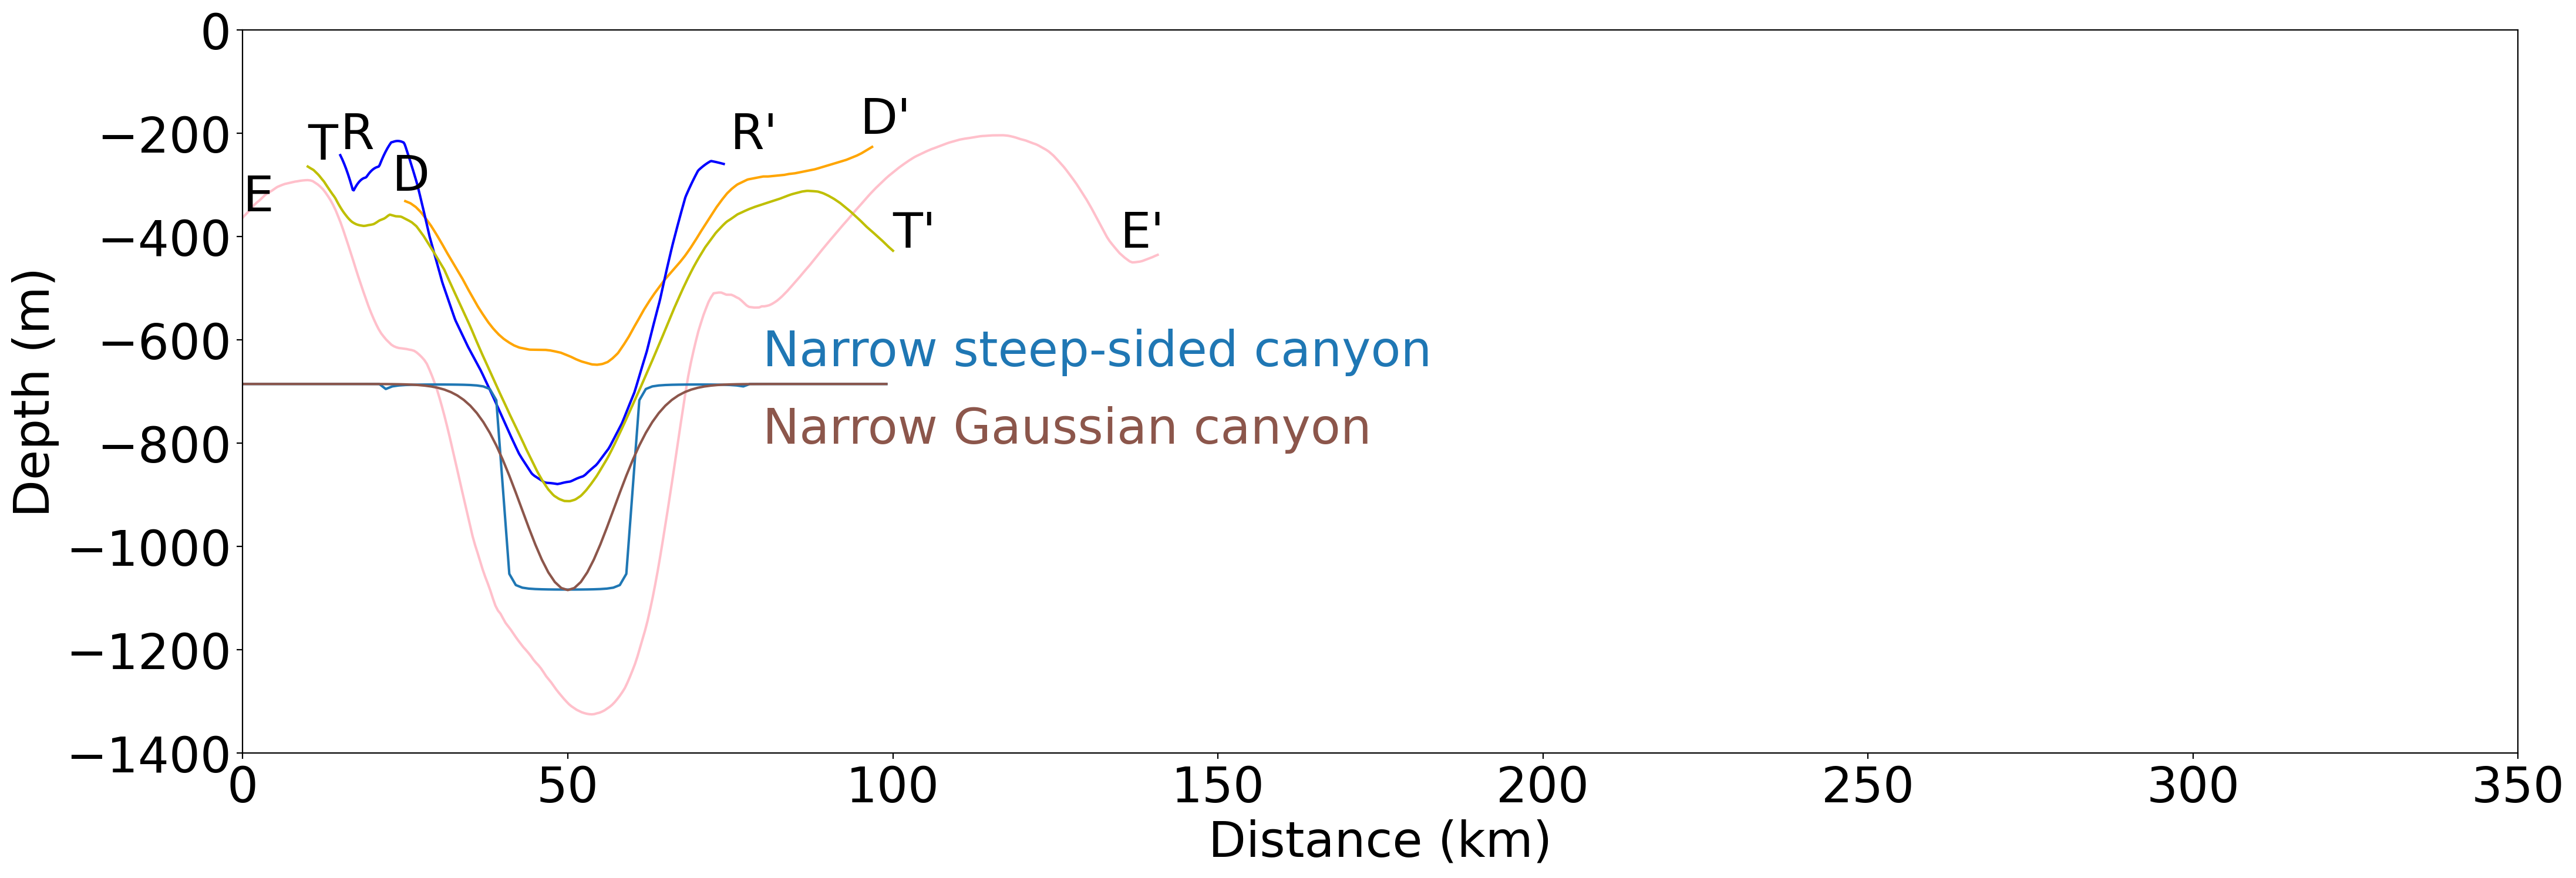

In [85]:
plt.figure(figsize = (25,8))
plt.plot(dist_denman+25, bath_denman, label = 'Denman' , color = cross_section_canyon[5][3])
plt.annotate('D', xy=(23, -310), xytext=(0, 0),xycoords='data', textcoords='offset points')
plt.annotate('D\'', xy=(95, -200), xytext=(0, 0),xycoords='data', textcoords='offset points')
plt.plot(dist_shirase+15, bath_shirase, label = 'Shirase', color =  cross_section_canyon[4][3])
plt.annotate('R', xy=(15, -230), xytext=(0, 0),xycoords='data', textcoords='offset points')
plt.annotate('R\'', xy=(75, -230), xytext=(0, 0),xycoords='data', textcoords='offset points')
plt.plot(dist_totten-15,bath_totten, label = 'Totten', color = cross_section_canyon[1][3])
plt.annotate('E', xy=(0, -350), xytext=(0, 0),xycoords='data', textcoords='offset points')
plt.annotate('E\'', xy=(135, -420), xytext=(0, 0),xycoords='data', textcoords='offset points')
plt.plot(dist_totten2+10,bath_totten2, label = 'Totten2', color = cross_section_canyon[2][3])
plt.annotate('T', xy=(10, -250), xytext=(0, 0),xycoords='data', textcoords='offset points')
plt.annotate('T\'', xy=(100, -420), xytext=(0, 0),xycoords='data', textcoords='offset points')

plt.plot(x[450:550]+50,bottom_narrow[100,450:550])
plt.annotate('Narrow steep-sided canyon', xy=(80, -650), xytext=(0, 0),xycoords='data', textcoords='offset points', color = 'C0')
plt.plot(x[450:550]+50,bottom_narrow_gaussian[100,450:550],  color = 'C5')
plt.annotate('Narrow Gaussian canyon', xy=(80, -800), xytext=(0, 0),xycoords='data', textcoords='offset points', color = 'C5')

plt.xlabel('Distance (km)')
plt.ylabel('Depth (m)')
plt.xlim([0,350])
plt.ylim([-1400,0])

(-1400.0, 0.0)

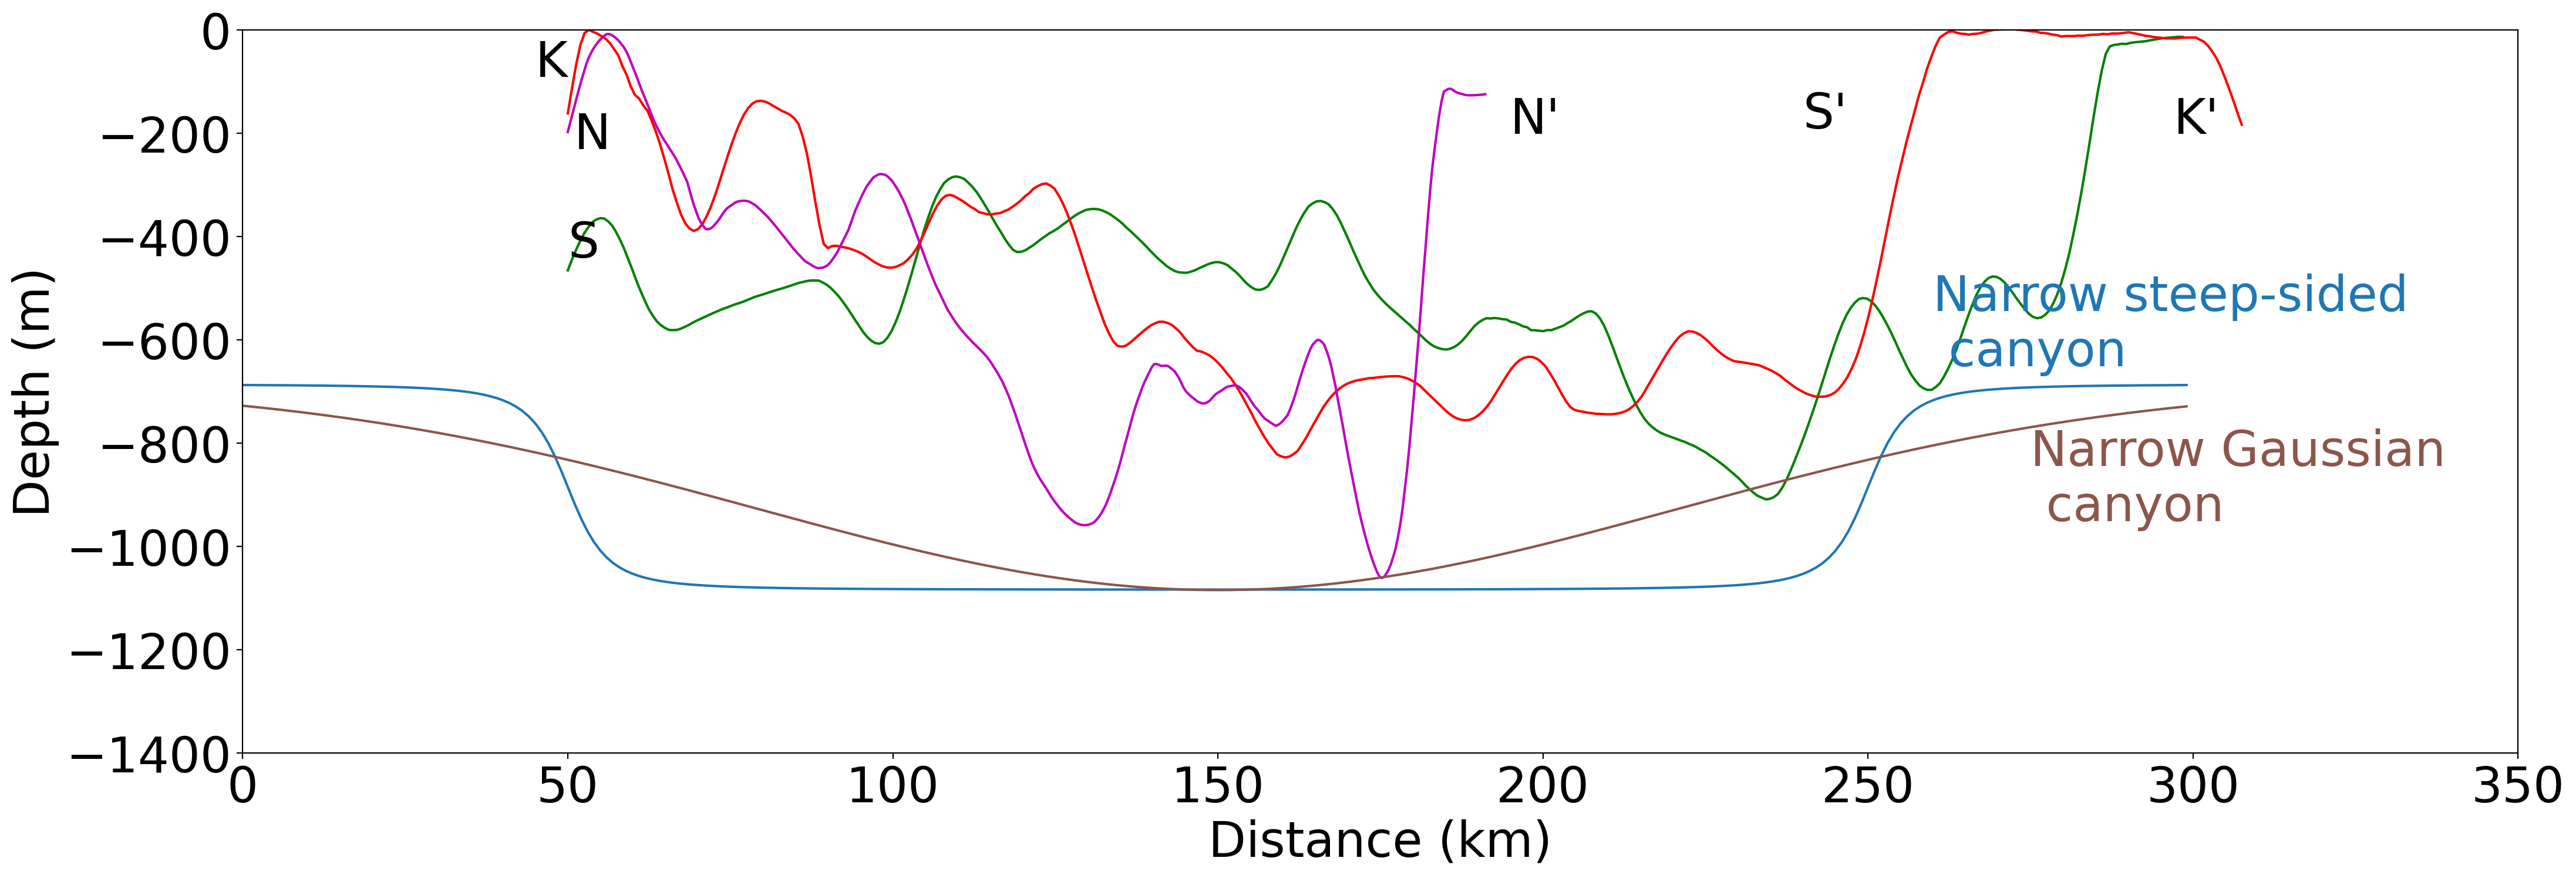

In [86]:
plt.figure(figsize = (25,8))
plt.plot(dist_sabrina+100-50,bath_sabrina, label = 'Sabrina Coast Depresion', color = cross_section_canyon[3][3])
plt.annotate('S', xy=(100-50,-440), xytext=(0, 0),xycoords='data', textcoords='offset points')
plt.annotate('S\'', xy=(290-50,-190), xytext=(0, 0),xycoords='data', textcoords='offset points')

plt.plot(dist_knox+100-50,bath_knox, label = 'Knox Coast Depresion', color = cross_section_canyon[0][3])
plt.annotate('K', xy=(95-50, -90), xytext=(0, 0),xycoords='data', textcoords='offset points')
plt.annotate('K\'', xy=(347-50, -200), xytext=(0, 0),xycoords='data', textcoords='offset points')

plt.plot(dist_90E+100-50,bath_90E, label = '90E', color = cross_section_canyon[6][3])
plt.annotate('N', xy=(101-50, -230), xytext=(0, 0),xycoords='data', textcoords='offset points')
plt.annotate('N\'', xy=(245-50, -200), xytext=(0, 0),xycoords='data', textcoords='offset points')

plt.plot(x[350:650]+150,bottom[100,350:650], label = 'Wide canyon')
plt.annotate('Narrow steep-sided\n canyon', xy=(260, -650), xytext=(0, 0),xycoords='data', textcoords='offset points', color = 'C0')
plt.plot(x[350:650]+150,bottomgaussian[100,350:650], label = 'Wide canyon', color = 'C5')
plt.annotate('Narrow Gaussian \n canyon', xy=(275, -950), xytext=(0, 0),xycoords='data', textcoords='offset points', color = 'C5')

plt.xlabel('Distance (km)')
plt.ylabel('Depth (m)')
plt.xlim([0,350])
plt.ylim([-1400,0])

Text(0, 0.5, 'Depth (m)')

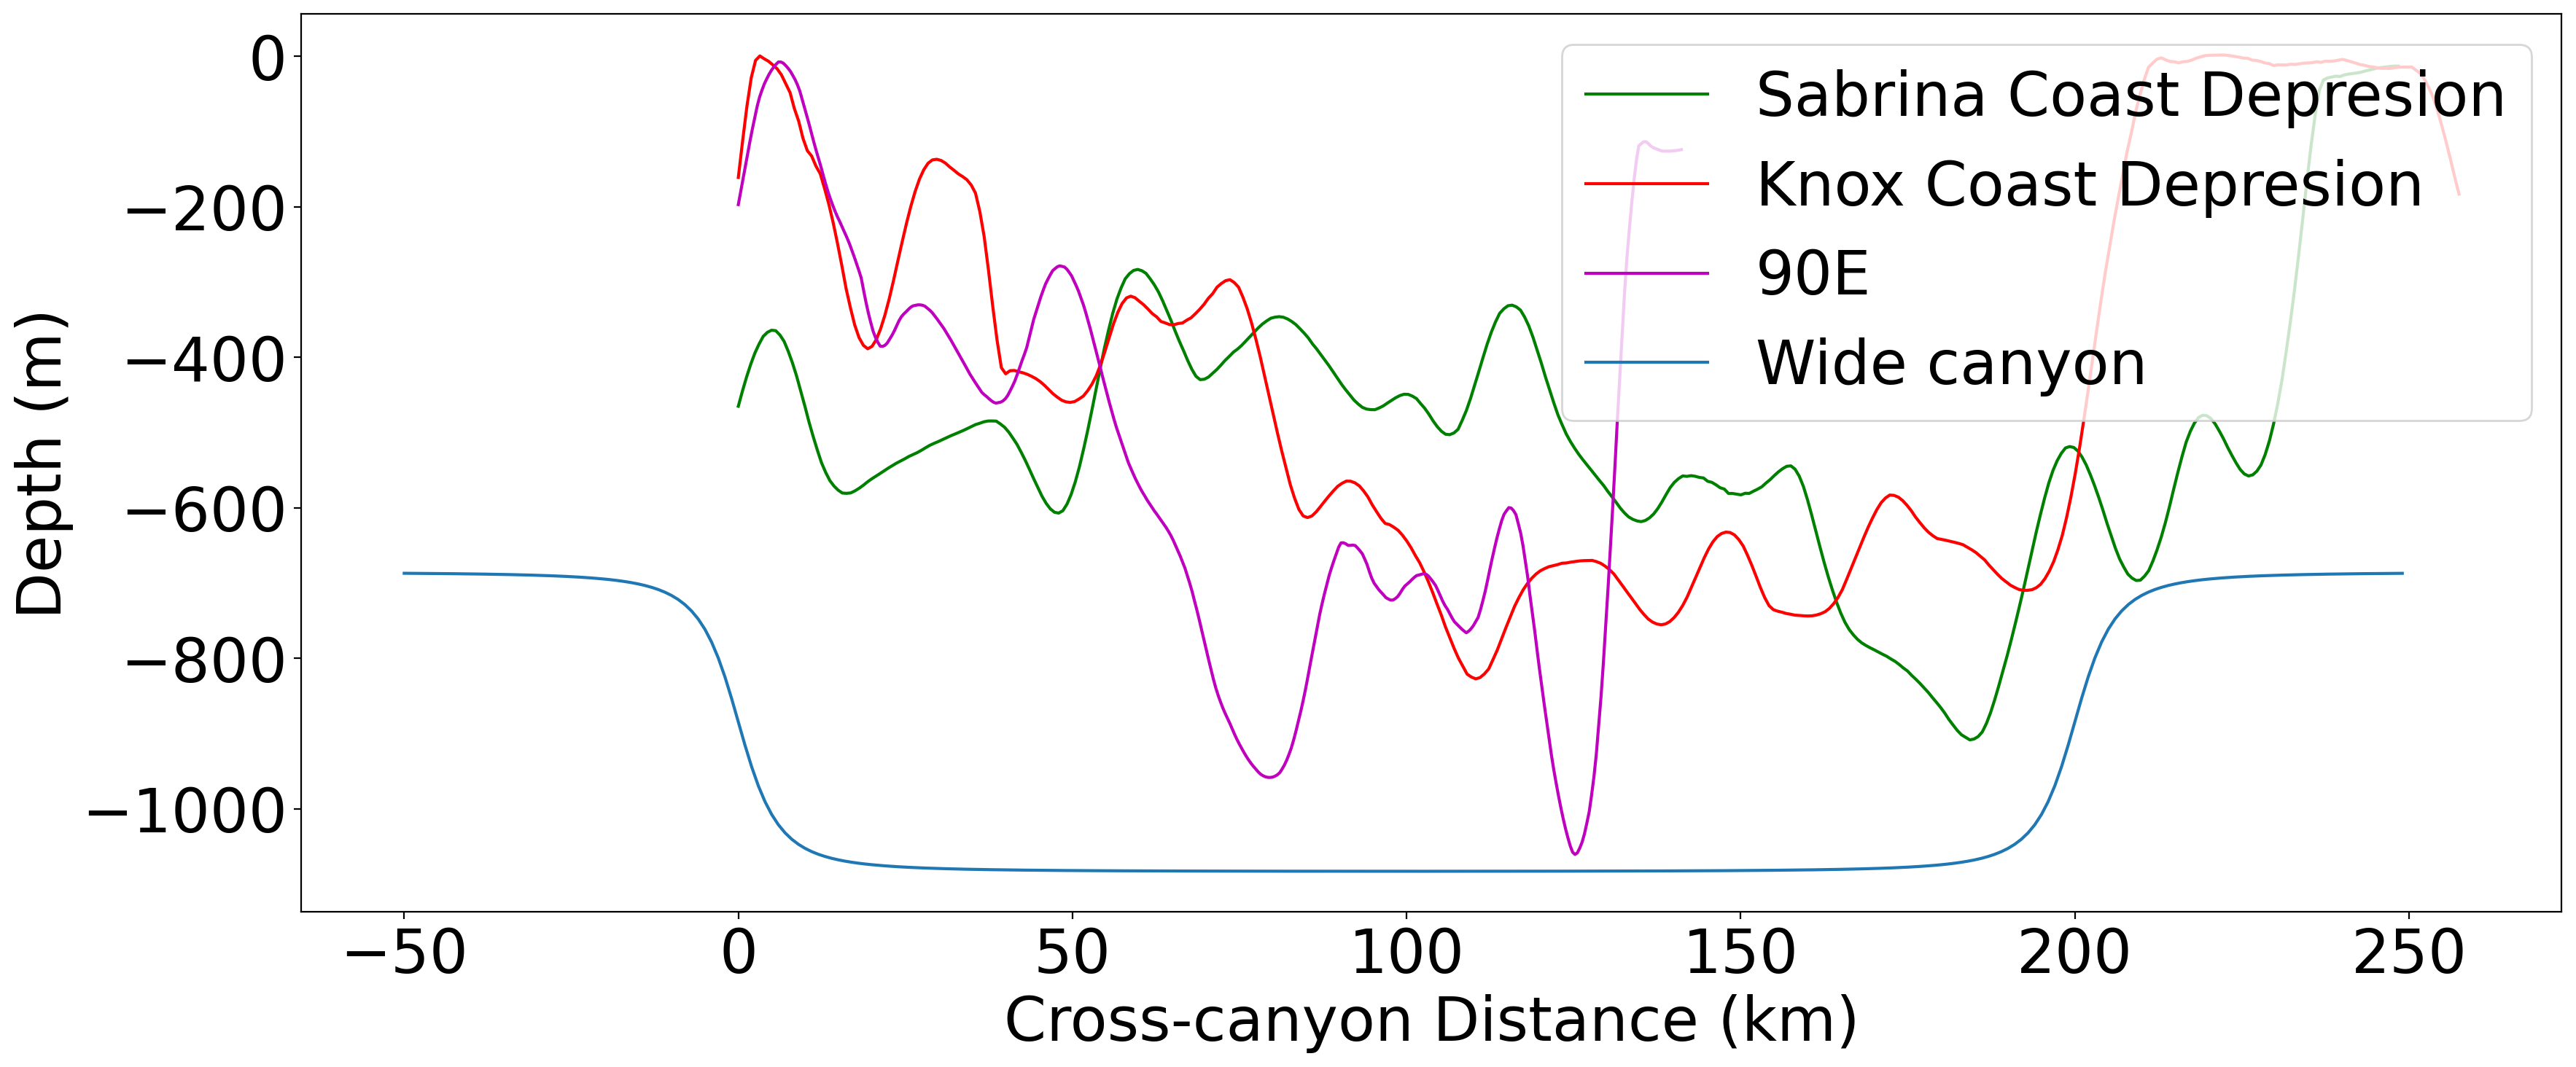

In [87]:
plt.figure(figsize = (20,8))
plt.plot(dist_sabrina,bath_sabrina, label = 'Sabrina Coast Depresion', color = cross_section_canyon[3][3])
plt.plot(dist_knox,bath_knox, label = 'Knox Coast Depresion', color = cross_section_canyon[0][3])
plt.plot(dist_90E,bath_90E, label = '90E', color = cross_section_canyon[6][3])
plt.plot(x[350:650]+100,bottom[100,350:650], label = 'Wide canyon')
plt.legend()
plt.xlabel('Cross-canyon Distance (km)')
plt.ylabel('Depth (m)')


In [88]:
import matplotlib as mpl

/jobfs/98808076.gadi-pbs/ipykernel_2685398/1469155211.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['','68$\degree$S','67$\degree$S','66$\degree$S','65$\degree$S','64$\degree$S','63$\degree$S'])
/jobfs/98808076.gadi-pbs/ipykernel_2685398/1469155211.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(['','90$\degree$E','100$\degree$E','110$\degree$E','120$\degree$E','130$\degree$E'])


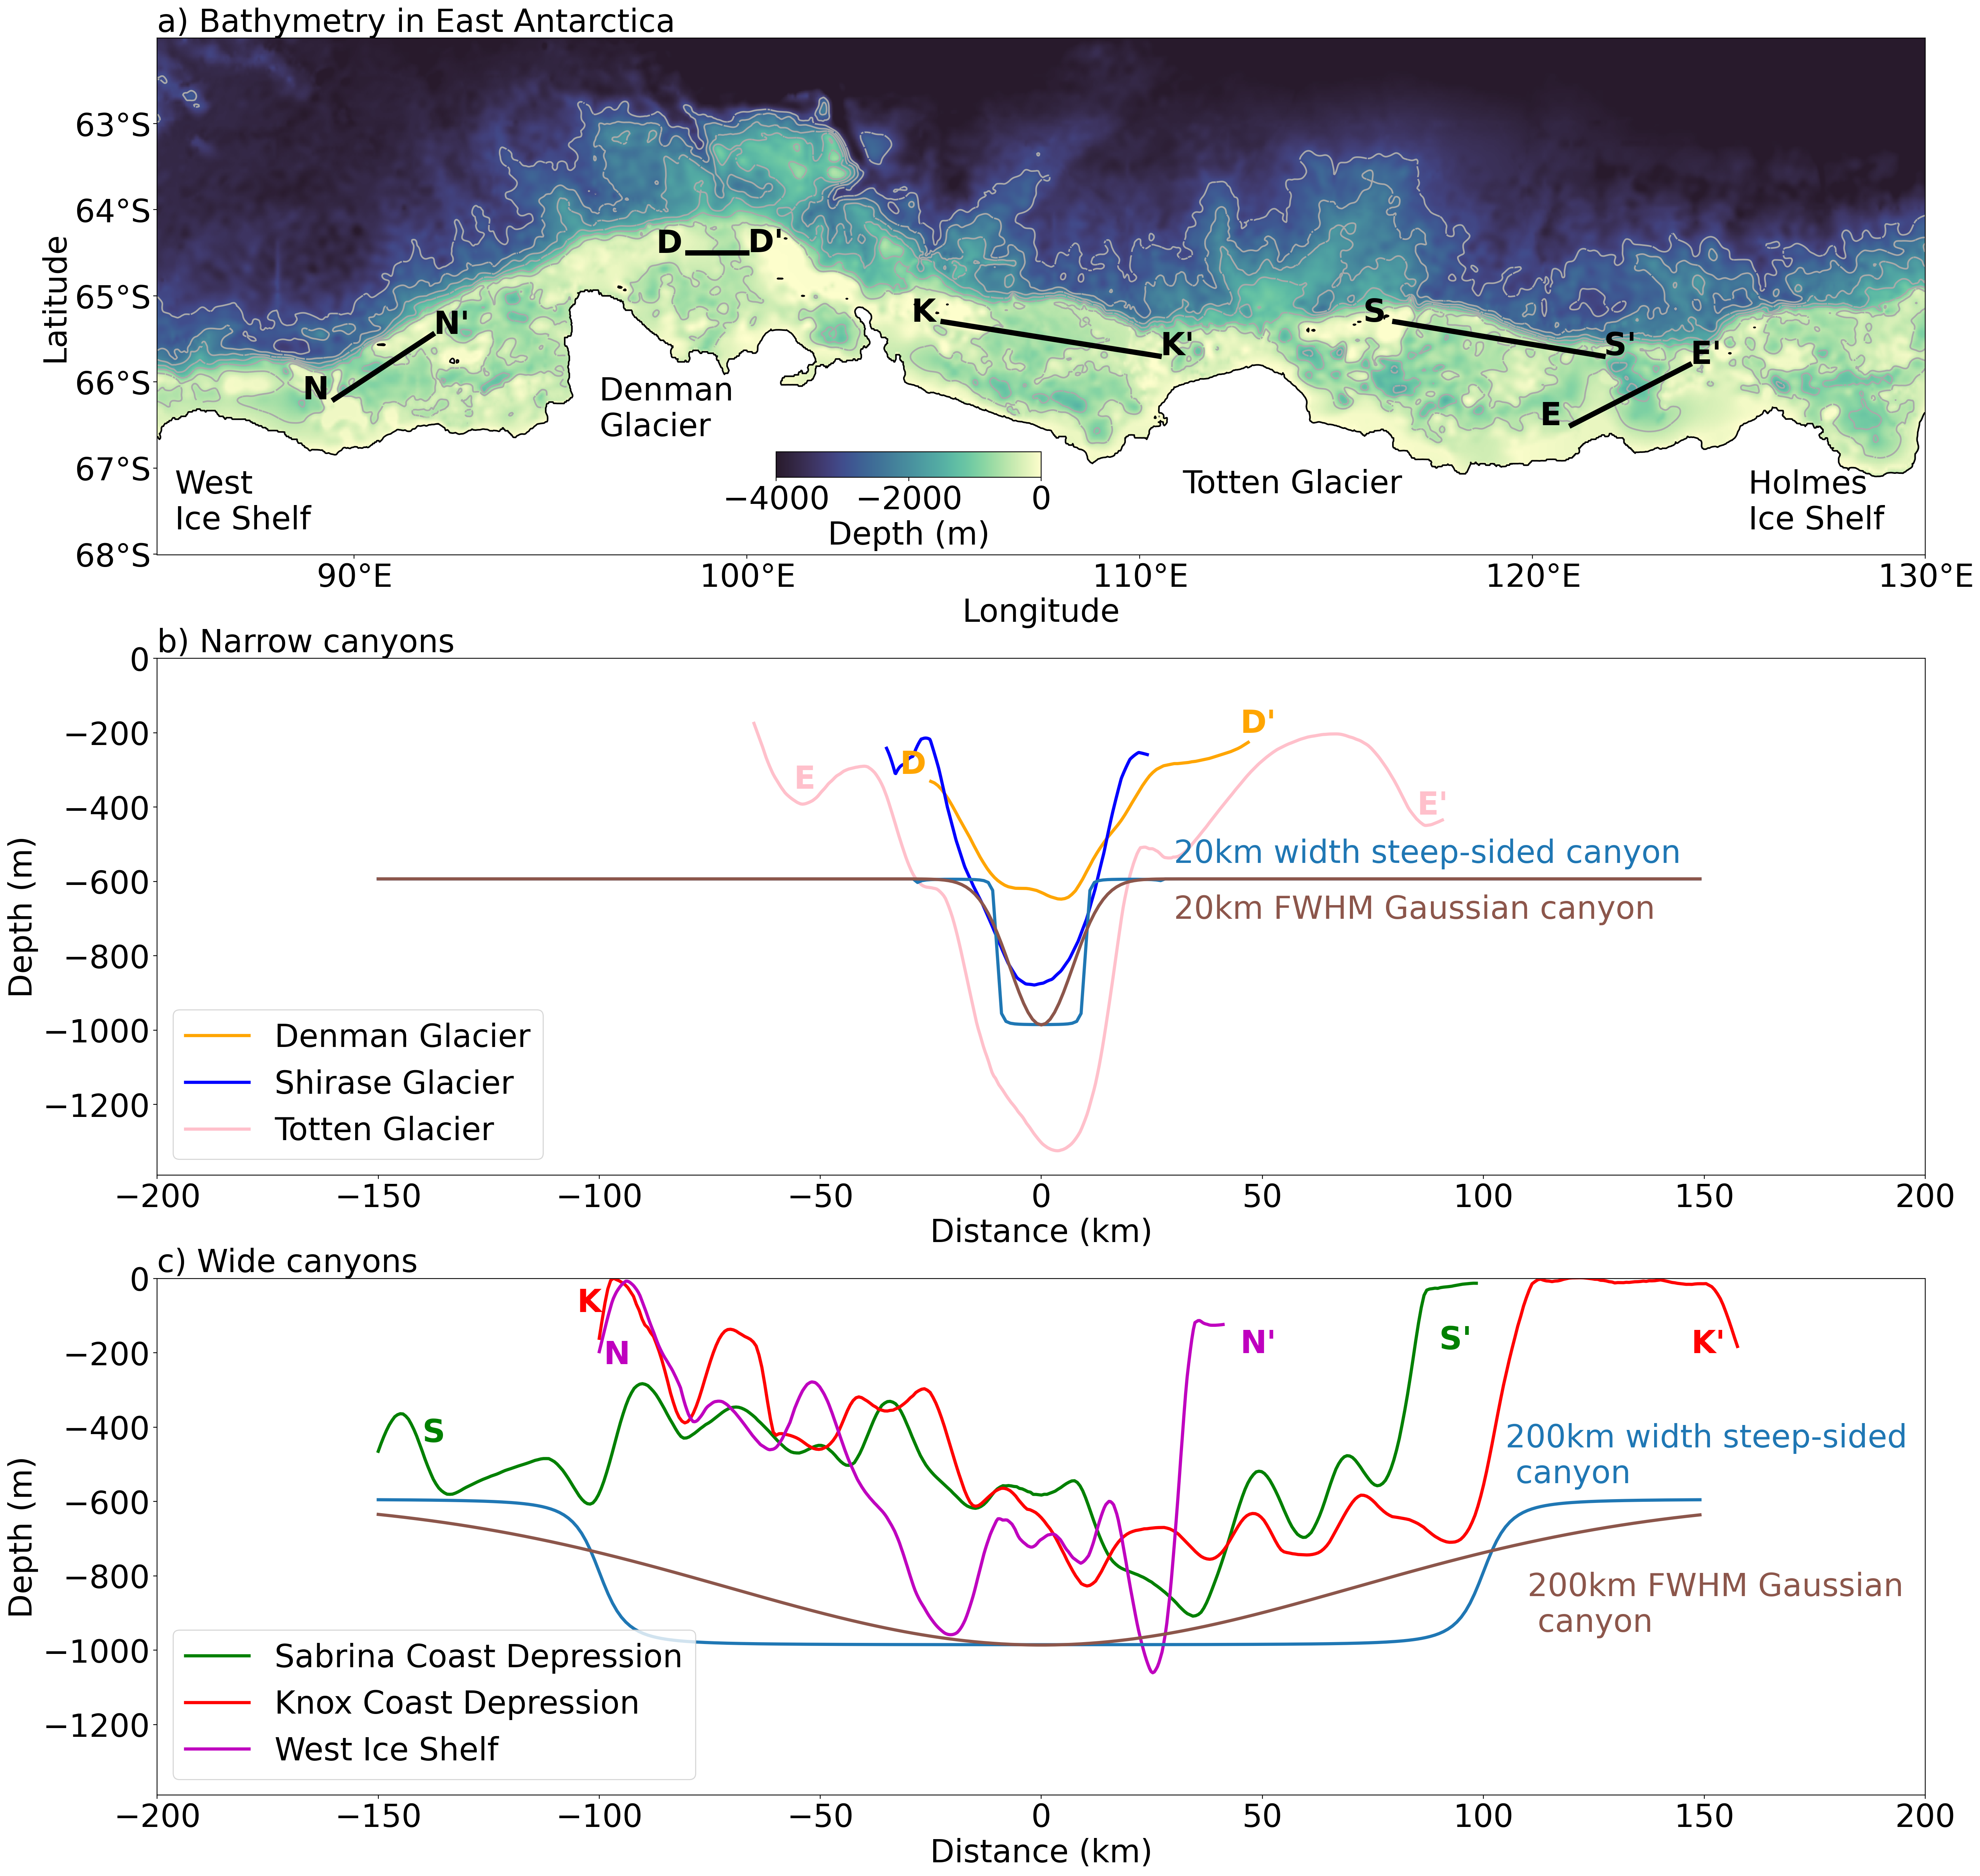

In [91]:
fig, axs = plt.subplots(nrows = 3, figsize = (30,30))
#ax = plt.axes()
light_topo = cmap_map(lambda x: x/2 +  0.5,  cmocean.cm.topo)# x/2 + 0.5, cmocean.cm.topo)
light_topo_map = cmocean.tools.crop_by_percent(cmocean.cm.topo, 50, which='max', N=None)
cmap = matplotlib.cm.get_cmap(cmocean.cm.topo)
rgba = cmap(0.7)

cmap_ocean = cmocean.tools.crop_by_percent(cmocean.cm.deep_r, 50, which='max', N=None)
norm = plt.Normalize(vmin = -4000, vmax = 0)

print(cmap_ocean)
ice_mask = ds.sel(y = slice(-68,-62)).sel(x = slice(85,130)) == ds_ice.sel(y = slice(-68,-62)).sel(x = slice(85,130)) 

ds.sel(y = slice(-68,-62)).sel(x = slice(85,130)).where(ice_mask == True).plot.contour(ax = axs[0], levels = range(-3000,0,500), cmap = 'darkgrey', add_colorbar = False)
#ds.sel(y = slice(-68,-62)).sel(x = slice(85,130)).where(ice_mask == True).plot.contour(ax = axs[0], levels = range(-1000,-500,100), cmap = 'k', add_colorbar = False)

colors = ds.sel(y = slice(-68,-62)).sel(x = slice(85,130)).plot(ax = axs[0],cmap = cmocean.cm.deep_r, vmax = 0, vmin = -4000, add_colorbar = False)
ds_ice.sel(y = slice(-68,-62)).sel(x = slice(85,130)).plot.contourf(ax = axs[0],levels = [0,6000], colors = ['None', 'w'], add_colorbar = False)#, transform = ccrs.PlateCarree())
ds_ice.sel(y = slice(-68,-62)).sel(x = slice(85,130)).plot.contour(ax = axs[0],levels = [0,6000], colors = [ 'k', 'None'], add_colorbar = False)#, transform = ccrs.PlateCarree())

cax = axs[0].inset_axes([0.35, 0.15, 0.15, 0.05])
cbar = plt.colorbar(colors, cmap = cmocean.cm.deep_r, ax = axs[0], cax = cax, orientation = 'horizontal', label = 'Depth (m)')

for i in range(len(cross_section_canyon_wo_shirase)):
    if i != 2:
        axs[0].plot([cross_section_canyon_wo_shirase[i][1][1],cross_section_canyon_wo_shirase[i][2][1]],[cross_section_canyon_wo_shirase[i][1][0], cross_section_canyon_wo_shirase[i][2][0]],  color ='k', label = cross_section_canyon[i][0], lw = 5)
        axs[0].annotate(cross_section_label_wo_shirase[i][1], xy=(cross_section_canyon_wo_shirase[i][1][1], cross_section_canyon_wo_shirase[i][1][0]), xytext=(-30, 0),xycoords='data', textcoords='offset points', fontweight='bold')
        axs[0].annotate(cross_section_label_wo_shirase[i][1] + '\'', xy=(cross_section_canyon_wo_shirase[i][2][1], cross_section_canyon_wo_shirase[i][2][0]),xytext=(1, 1),xycoords='data', textcoords='offset points', fontweight='bold')
    #else:
        #axs[0].annotate(cross_section_label_wo_shirase[i][1], xy=(cross_section_canyon_wo_shirase[i][1][1], cross_section_canyon_wo_shirase[i][1][0]), xytext=(20, -20),xycoords='data', textcoords='offset points', fontweight='bold')
        #axs[0].annotate(cross_section_label_wo_shirase[i][1] + '\'', xy=(cross_section_canyon_wo_shirase[i][2][1], cross_section_canyon_wo_shirase[i][2][0]),xytext=(-25, -25),xycoords='data', textcoords='offset points', fontweight='bold')
        
axs[0].annotate('West \nIce Shelf', xy=(0.01,0.05),xytext=(0, 0),xycoords='axes fraction', textcoords='offset points',  color = 'k')
axs[0].annotate('Denman \nGlacier', xy=(0.25,0.23),xytext=(0, 0),xycoords='axes fraction', textcoords='offset points',  color = 'k')
axs[0].annotate('Totten Glacier', xy=(0.58,0.12),xytext=(0, 0),xycoords='axes fraction', textcoords='offset points', color = 'k')
axs[0].annotate('Holmes \nIce Shelf', xy=(0.9,0.05),xytext=(0, 0),xycoords='axes fraction', textcoords='offset points',  color = 'k')

axs[0].set_yticklabels(['','68$\degree$S','67$\degree$S','66$\degree$S','65$\degree$S','64$\degree$S','63$\degree$S'])
axs[0].set_ylabel('Latitude')
axs[0].set_xticklabels(['','90$\degree$E','100$\degree$E','110$\degree$E','120$\degree$E','130$\degree$E'])
axs[0].set_xlabel('Longitude')
axs[0].set_title('a) Bathymetry in East Antarctica',  loc='left', fontsize='medium')

linewidth = 3
shift_narrow = 50
# narrow canyons
axs[1].plot(dist_denman+25-shift_narrow, bath_denman, label = 'Denman Glacier' , color = cross_section_canyon[5][3], lw =linewidth)
axs[1].annotate('D', xy=(18-shift_narrow, -310), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[5][3], fontweight='bold')
axs[1].annotate('D\'', xy=(95-shift_narrow, -200), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[5][3], fontweight='bold')
axs[1].plot(dist_shirase+15-shift_narrow, bath_shirase, label = 'Shirase Glacier', color =  cross_section_canyon[4][3], lw =linewidth)
#axs[1].annotate('R', xy=(15-shift_narrow, -230), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[4][3], fontweight='bold')
#axs[1].annotate('R\'', xy=(75-shift_narrow, -230), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[4][3], fontweight='bold')
axs[1].plot(dist_totten-15-shift_narrow,bath_totten, label = 'Totten Glacier', color = cross_section_canyon[1][3], lw =linewidth)
axs[1].annotate('E', xy=(-6-shift_narrow, -350), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[1][3], fontweight='bold')
axs[1].annotate('E\'', xy=(135-shift_narrow, -420), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[1][3], fontweight='bold')
#axs[1].plot(dist_totten2+10-shift_narrow,bath_totten2, label = 'Totten2', color = cross_section_canyon[2][3], lw =linewidth)
#axs[1].annotate('T', xy=(10-shift_narrow, -250), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[2][3], fontweight='bold')
#axs[1].annotate('T\'', xy=(100-shift_narrow, -420), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[2][3], fontweight='bold')

axs[1].plot(x[350:650]+50-shift_narrow,bottom_narrow[150,350:650], lw =linewidth)
axs[1].annotate('20km width steep-sided canyon', xy=(80-shift_narrow, -550), xytext=(0, 0),xycoords='data', textcoords='offset points', color = 'C0')
axs[1].plot(x[350:650]+50-shift_narrow,bottom_narrow_gaussian[150,350:650],  color = 'C5', lw =linewidth)
axs[1].annotate('20km FWHM Gaussian canyon', xy=(80-shift_narrow, -700), xytext=(0, 0),xycoords='data', textcoords='offset points', color = 'C5')

axs[1].set_xlabel('Distance (km)')
axs[1].set_ylabel('Depth (m)')
axs[1].set_xlim([-200,200])
axs[1].set_ylim([-1390,0])
axs[1].set_title('b) Narrow canyons',  loc='left', fontsize='medium')
axs[1].legend(loc = 'lower left')

shift = 150
## wide canyons
axs[2].plot(dist_sabrina+50-50-shift,bath_sabrina, label = 'Sabrina Coast Depression', color = cross_section_canyon[3][3], lw =linewidth)
axs[2].annotate('S', xy=(60-50-shift,-440), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[3][3], fontweight='bold')
axs[2].annotate('S\'', xy=(290-50-shift,-190), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[3][3], fontweight='bold')

axs[2].plot(dist_knox+100-50-shift,bath_knox, label = 'Knox Coast Depression', color = cross_section_canyon[0][3], lw =linewidth)
axs[2].annotate('K', xy=(95-50-shift, -90), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[0][3], fontweight='bold')
axs[2].annotate('K\'', xy=(347-50-shift, -200), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[0][3], fontweight='bold')

axs[2].plot(dist_90E+100-50 -shift,bath_90E, label = 'West Ice Shelf', color = cross_section_canyon[6][3], lw =linewidth)
axs[2].annotate('N', xy=(101-50-shift, -230), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[6][3], fontweight='bold')
axs[2].annotate('N\'', xy=(245-50-shift, -200), xytext=(0, 0),xycoords='data', textcoords='offset points', color = cross_section_canyon[6][3], fontweight='bold')

axs[2].plot(x[350:650]+150-shift,bottom_wide[150,350:650],  lw =linewidth)
axs[2].annotate('200km width steep-sided\n canyon', xy=(255-shift, -550), xytext=(0, 0),xycoords='data', textcoords='offset points', color = 'C0')
axs[2].plot(x[350:650]+150-shift,bottom_wide_gaussian[150,350:650],  color = 'C5', lw =linewidth)
axs[2].annotate('200km FWHM Gaussian \n canyon', xy=(260-shift, -950), xytext=(0, 0),xycoords='data', textcoords='offset points', color = 'C5')

axs[2].set_xlabel('Distance (km)')
axs[2].set_ylabel('Depth (m)')
axs[2].set_xlim([-200,200])
axs[2].set_ylim([-1390,0])
axs[2].set_title('c) Wide canyons',  loc='left', fontsize='medium')
axs[2].legend()

fig.savefig('/g/data/v45/qo9901/layeredASFpaper_fig/Figobs_ETOPO_fig_trial_color_glaciername.pdf')